# Research on connectivity between neurons in the brain and in the VNC

As there is already papers studying interconnectivity in brain neurons and in VNC neurons, I tried to study the connections between the 2. And to do that I first focus on the first connections between the brain and the VNC. Here's scheme (focusing on the red arrows) :

<center><img src='images/neurons_interconnectivity.png'/></center>

## I - Get data of connections

First step is to get the data of direct connections from the brain to the VNC. To do that I used the code provided and added some other functions in `utils.py` to help me.

In [1]:
import utils
from vnc_networks.vnc_networks.connectome_reader import MANC
from vnc_networks.vnc_networks.connections import Connections
import matplotlib.pyplot as plt
import pandas
import umap
import umap.plot

C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\numba\np\ufunc\dufunc.py:344: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\numba\np\ufunc\dufunc.py:344: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\numba\np\ufunc\dufunc.py:344: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings

In [2]:
#If you only use the dataset.csv you don't need to run this !

# Load the connections in the VNC from the MANC dataset
CR = MANC('v1.2')
vnc = Connections(CR = CR)

Attribute class_1 not found in the graph. Adding it.


In [3]:
# Can specify a side or a target like so :
# side = 'RHS' right hand side, can also be 'LHS'
# target = 'fl' front leg, can also be 'ml' or 'hl'

# We take descending neurons as input, we can specify a type since it can be a lot of neurons else
input_neurons = vnc.get_neuron_ids(
    {
        'class_1' : 'descending', # descending neuron
        'type': 'DNg11', # a specific name
    }
)

ascending_neurons = vnc.get_neuron_ids(
    {
        'class_1' : 'ascending',

    })
print(f"Found {len(input_neurons)} descending neurons")
print(f"Found {len(ascending_neurons)} ascending neurons")

Found 6 descending neurons
Found 1849 ascending neurons


In [4]:
# Create a new graph with the connections that we want
subnetwork = vnc.subgraph_from_paths(
    source = input_neurons,
    target = ascending_neurons,
    n_hops = 1, # specifying 1 gives only direct connections
    keep_edges = 'direct',
)

Attribute class_1 not found in the graph. Adding it.


In [5]:
# print the data with the connections
utils.show_data_connections(subnetwork)

Attribute name not found in the graph. Adding it.


,source_body_ids,source_name,source_class,target_body_id,target_name,target_class,syn_count,eff_weights
0,23026,[DNxn014],[descending],11741,[ANXXX023],[ascending],79,-79
1,23026,[DNxn014],[descending],12578,[AN07B032],[ascending],14,-14
2,23026,[DNxn014],[descending],13062,[AN02A017],[ascending],5,-5
3,23026,[DNxn014],[descending],21841,[AN19B060],[ascending],11,-11
4,23688,[DNxn014],[descending],10322,[AN07B003],[ascending],5,-5
5,23688,[DNxn014],[descending],13691,[AN07B032],[ascending],14,-14
6,23688,[DNxn014],[descending],16700,[AN19B059],[ascending],5,-5
7,23688,[DNxn014],[descending],100314,[ANXXX023],[ascending],45,-45
8,24332,[DNxn014],[descending],10294,[AN07B003],[ascending],8,-8
9,24332,[DNxn014],[descending],11741,[ANXXX023],[ascending],66,-66


## II - Results


I have generated the data in ```dataset.csv``` which should be in the folder. You can then retrieve it in a pandas dataframe.

In [3]:
df = pandas.read_csv("dataset/dataset.csv")

### How to use it :
1 - Get simple information for a particular type (for all possible types you can refer to the list in ```utils.list_name```), for exemple we take 'DNfl010'



In [7]:
# Average number of synapses and standard deviation
mean, std = utils.get_syn_info(df,'DNfl010')
print(mean,std)

15.271028037383177 13.361756156159824


In [8]:
#Average weight of the connections, often they will be the same because weight is the same magnitude as the synapses but negative or positive depending on the type of connections.
mean_weight = utils.get_weight_info(df,'DNfl010')
print(mean_weight)

15.271028037383177


In [9]:
# Get how many neurons of a particular class a type of neurons targets, you can have all the classes in utils.target_class_list
nb_ascending_neurons = utils.get_nb_neurons_target(df,'DNfl010','ascending')
print(nb_ascending_neurons)

#'DNfl010' type have direct connections to 67 ascending neurons

67


In [10]:
#Get the number of total synapses are used to connect to a particular class
nb_synapses_ascending = utils.get_nb_syn_target(df,'DNfl010','ascending')
print(nb_synapses_ascending)
#1176 synapses are used to target ascending neurons

1176


### 2 - Plot the data

2.1 - Plot average number of synapses per neurons in a certain type


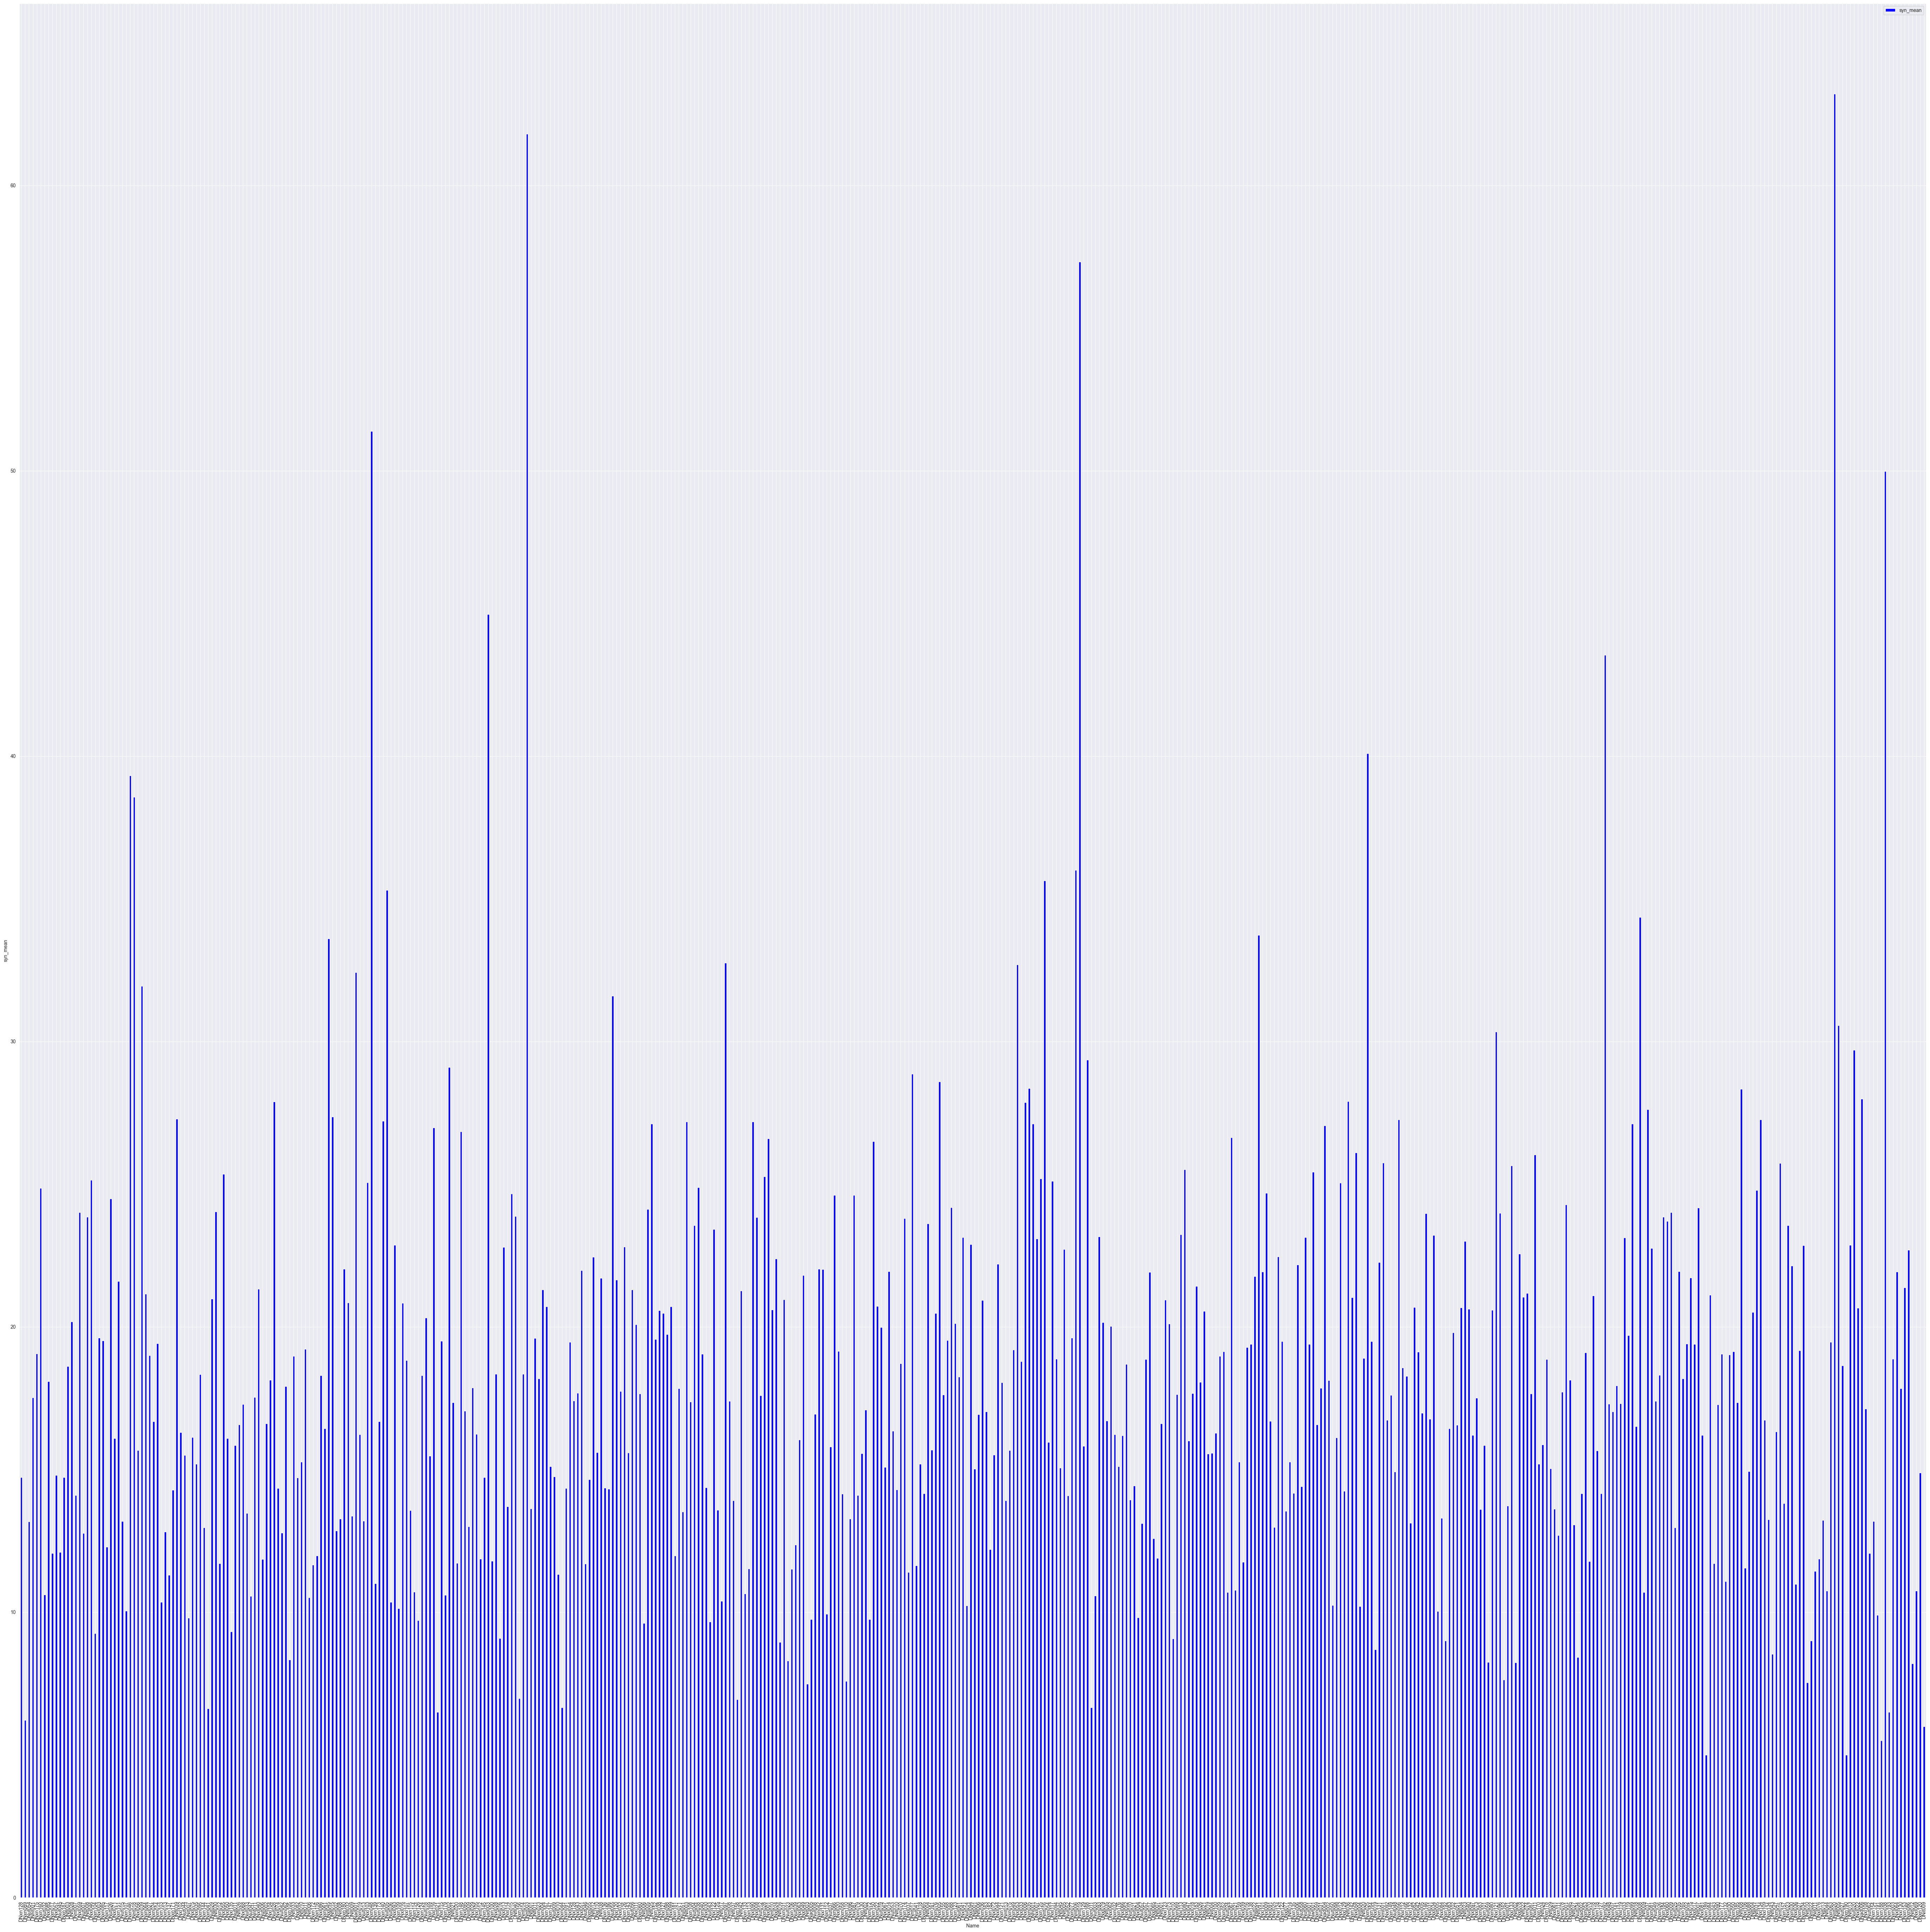

In [11]:
# Unsorted plot of average number of synapses
p = utils.plot_source_syn_mean_or_std(df,'mean')

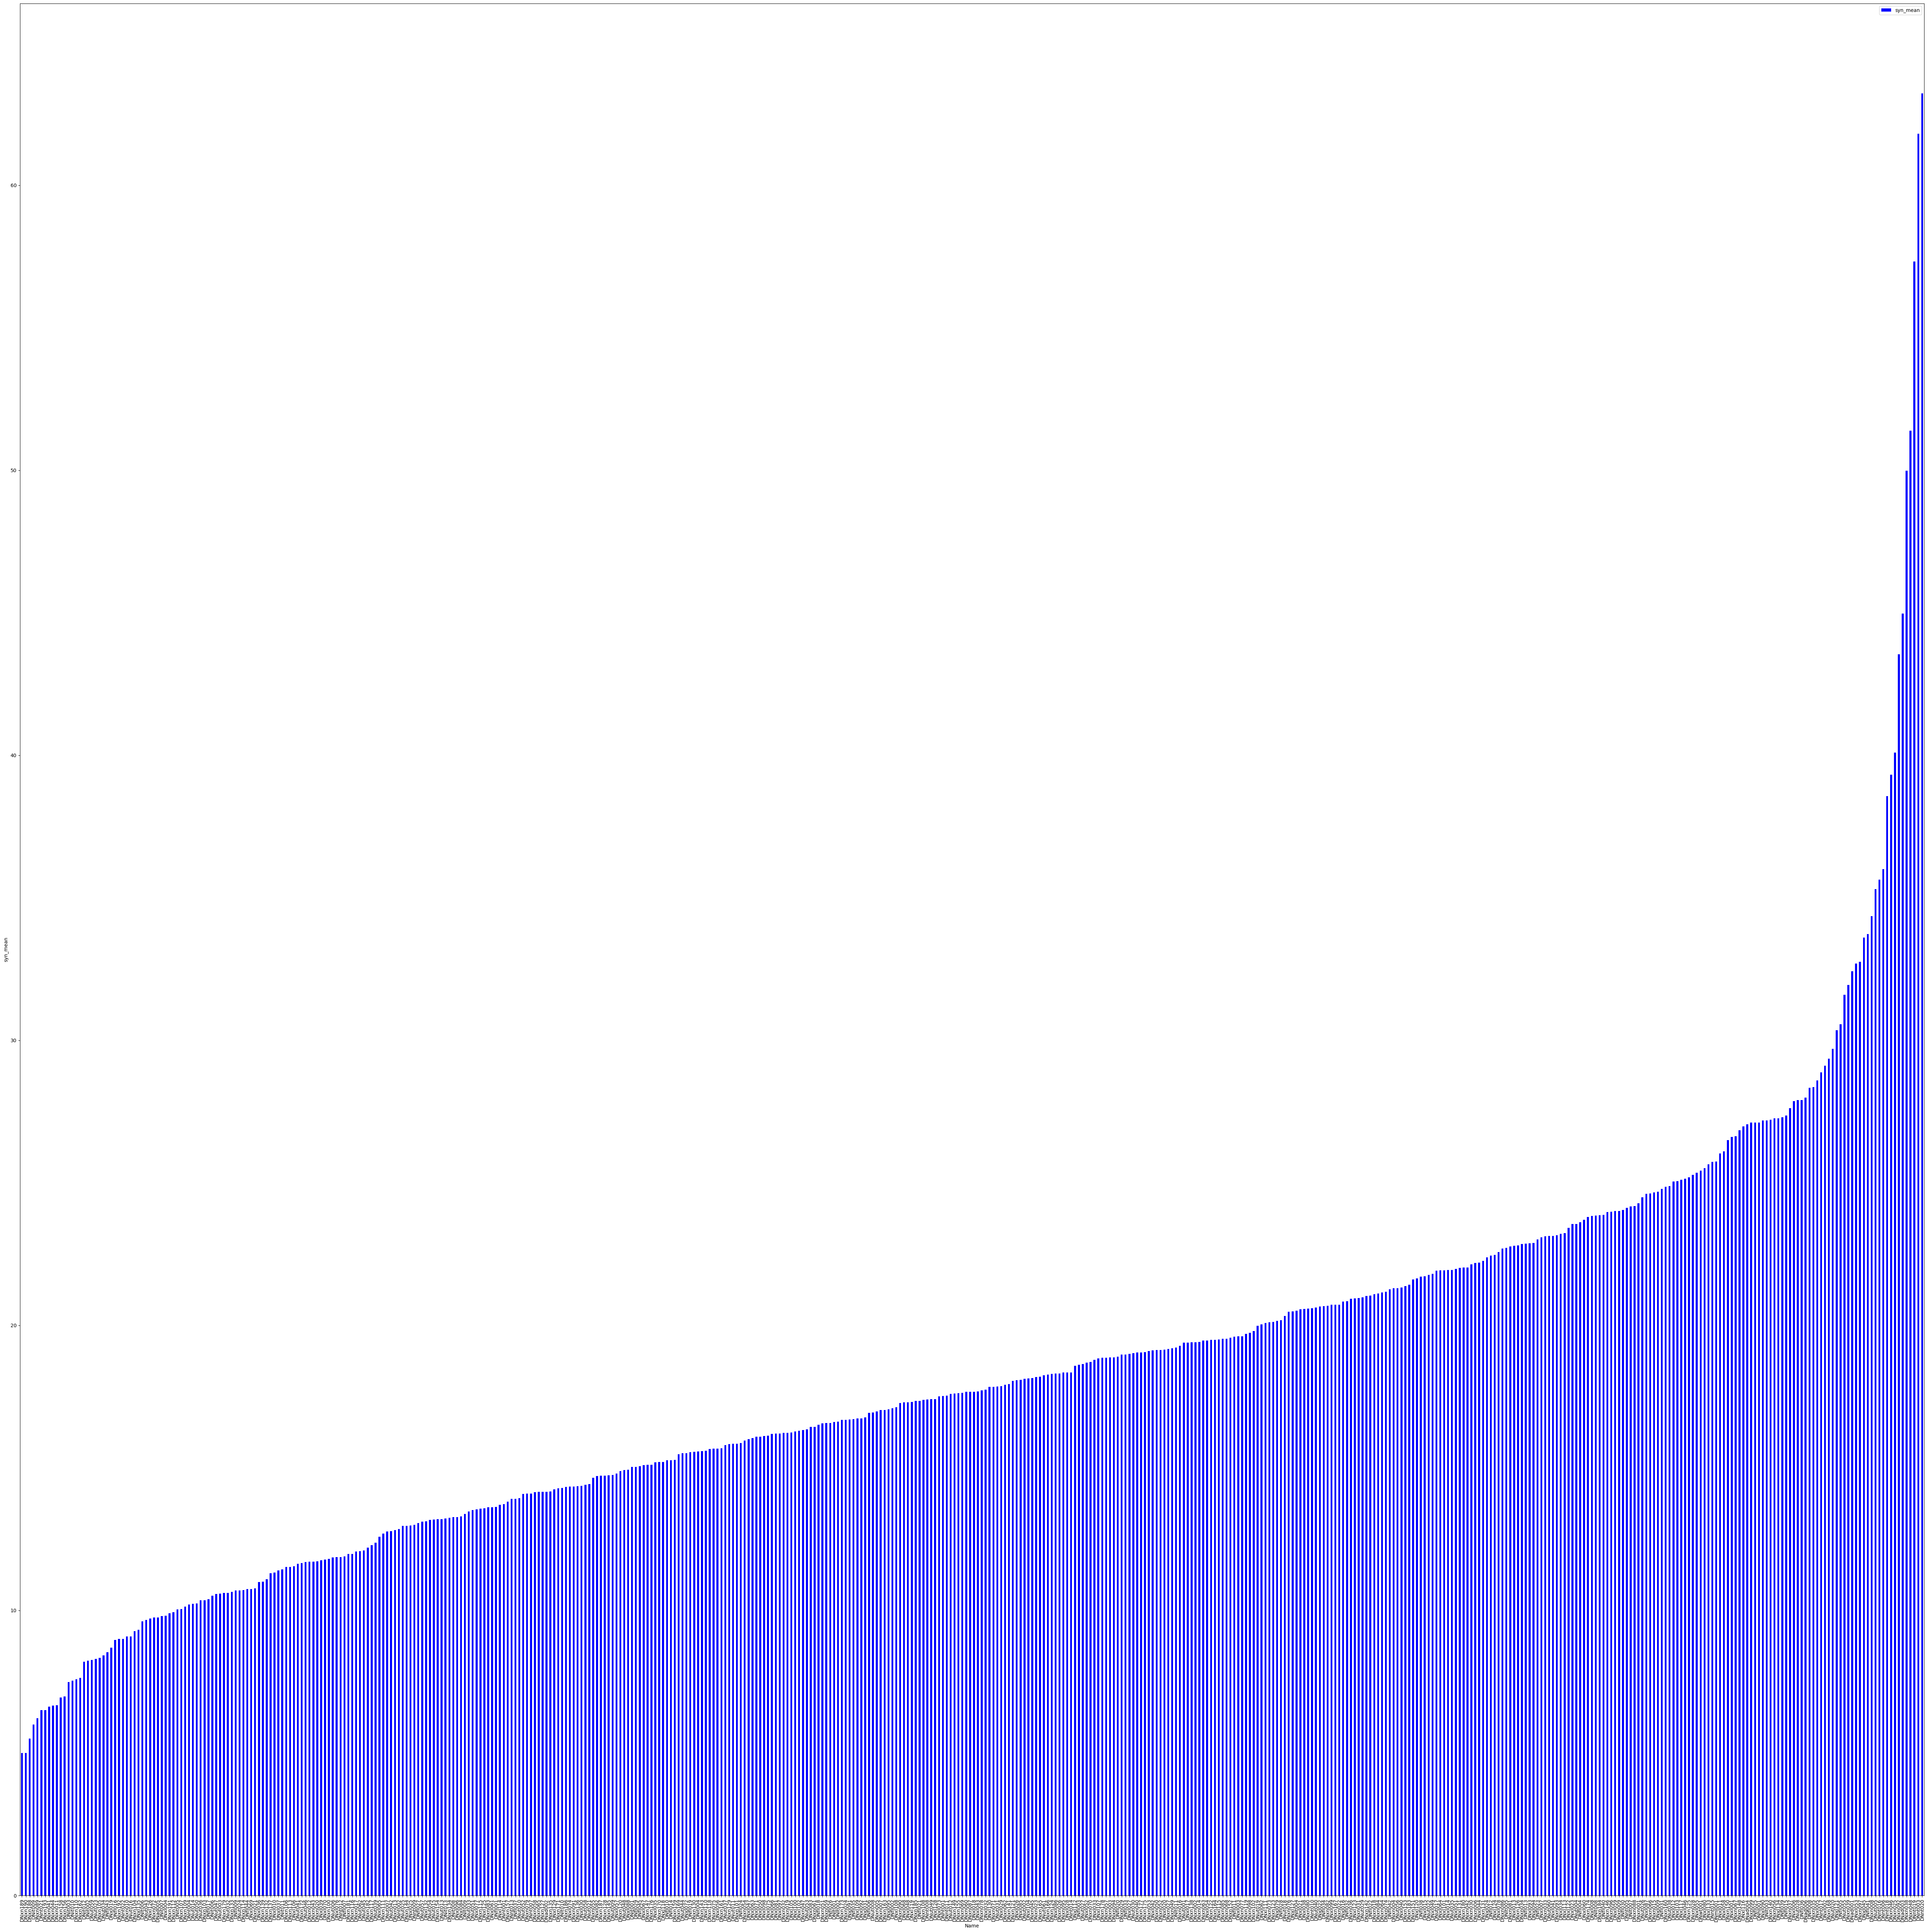

In [9]:
#Sorted plot of average number of synapses
p = utils.plot_source_syn_mean_or_std(df,type = 'mean',sort_type='mean')

* You can replace 'mean' by 'std' in type, it will plot the std instead of the mean
* For sorting, you can either don't sort it (default), by mean : sort_type = 'mean' or by std : sort_type = 'std'

2.2 Plotting average weight distribution

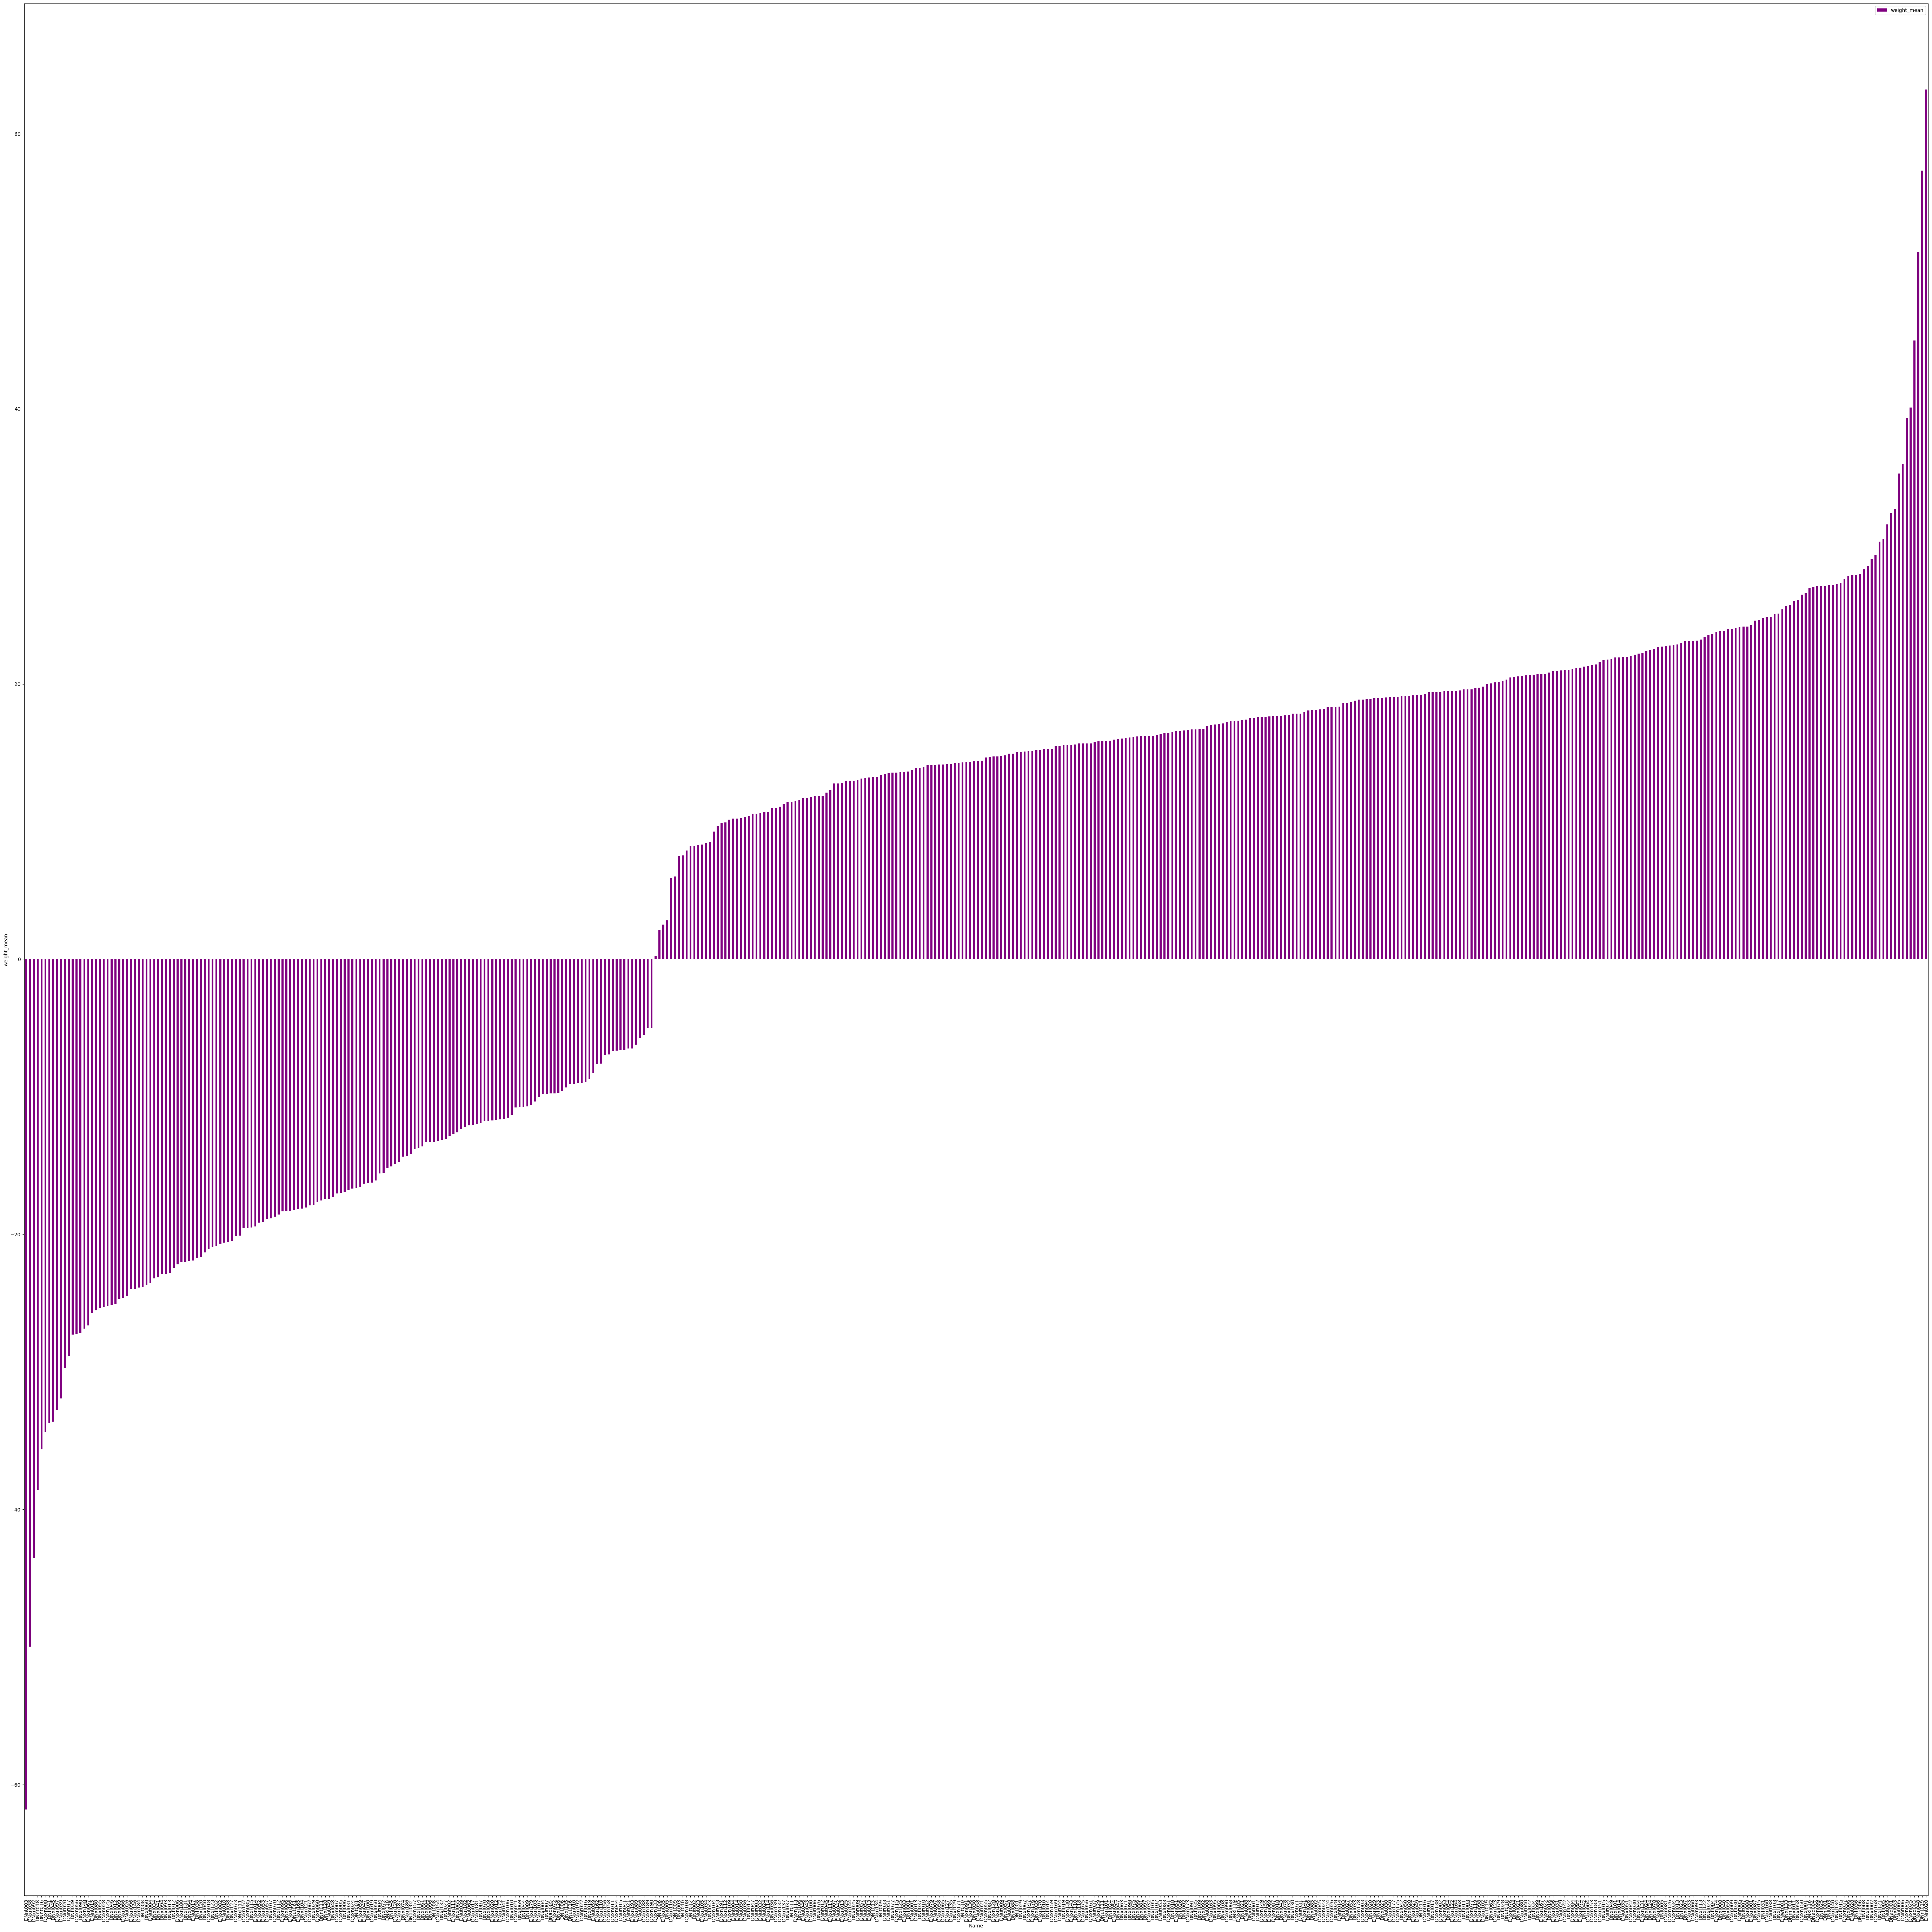

In [10]:
p = utils.plot_weight_distribution(df,sort_type='mean')

2.3 Plot target class repartition for a specific type, e.g 'DNfl010'

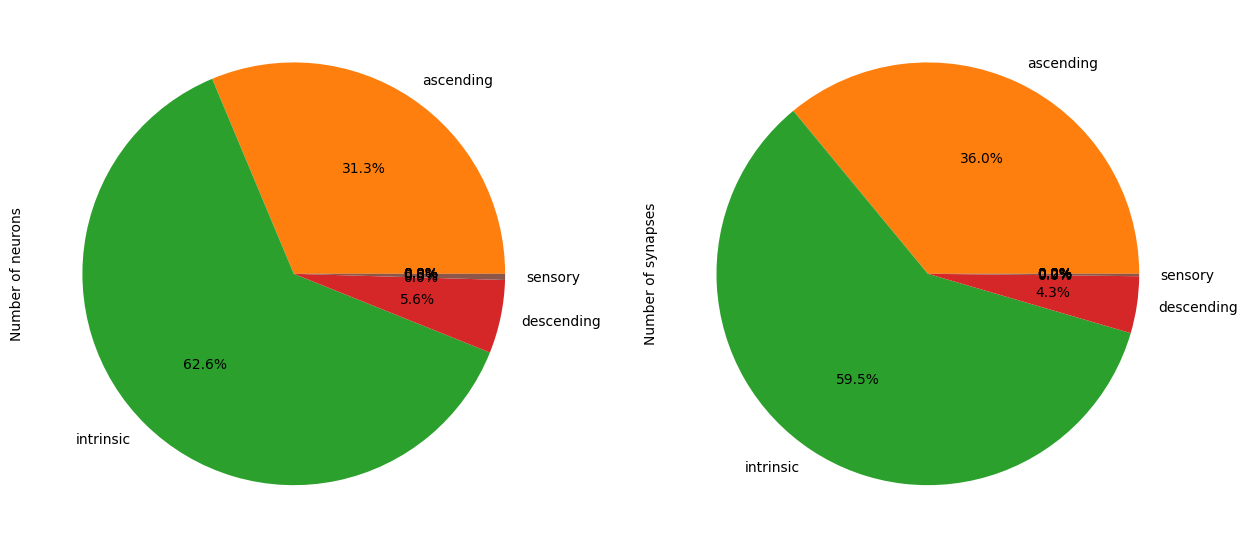

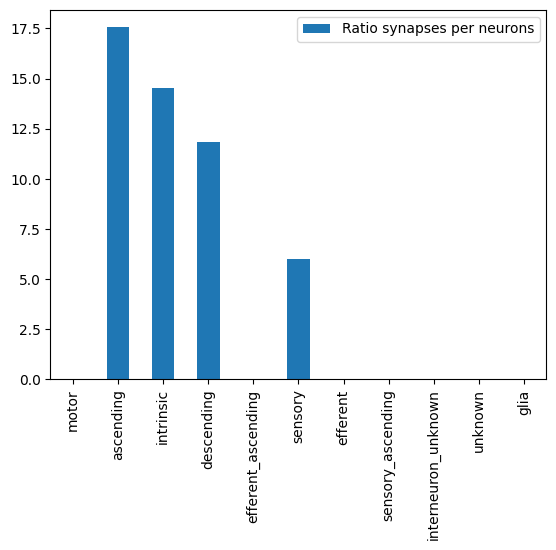

In [4]:
p = utils.plot_repartition(df,'DNfl010')
p = utils.plot_ratio_syn_per_class(df,'DNfl010')

2.4 Plot number of descending neurons type that connect to neurons types in the vnc

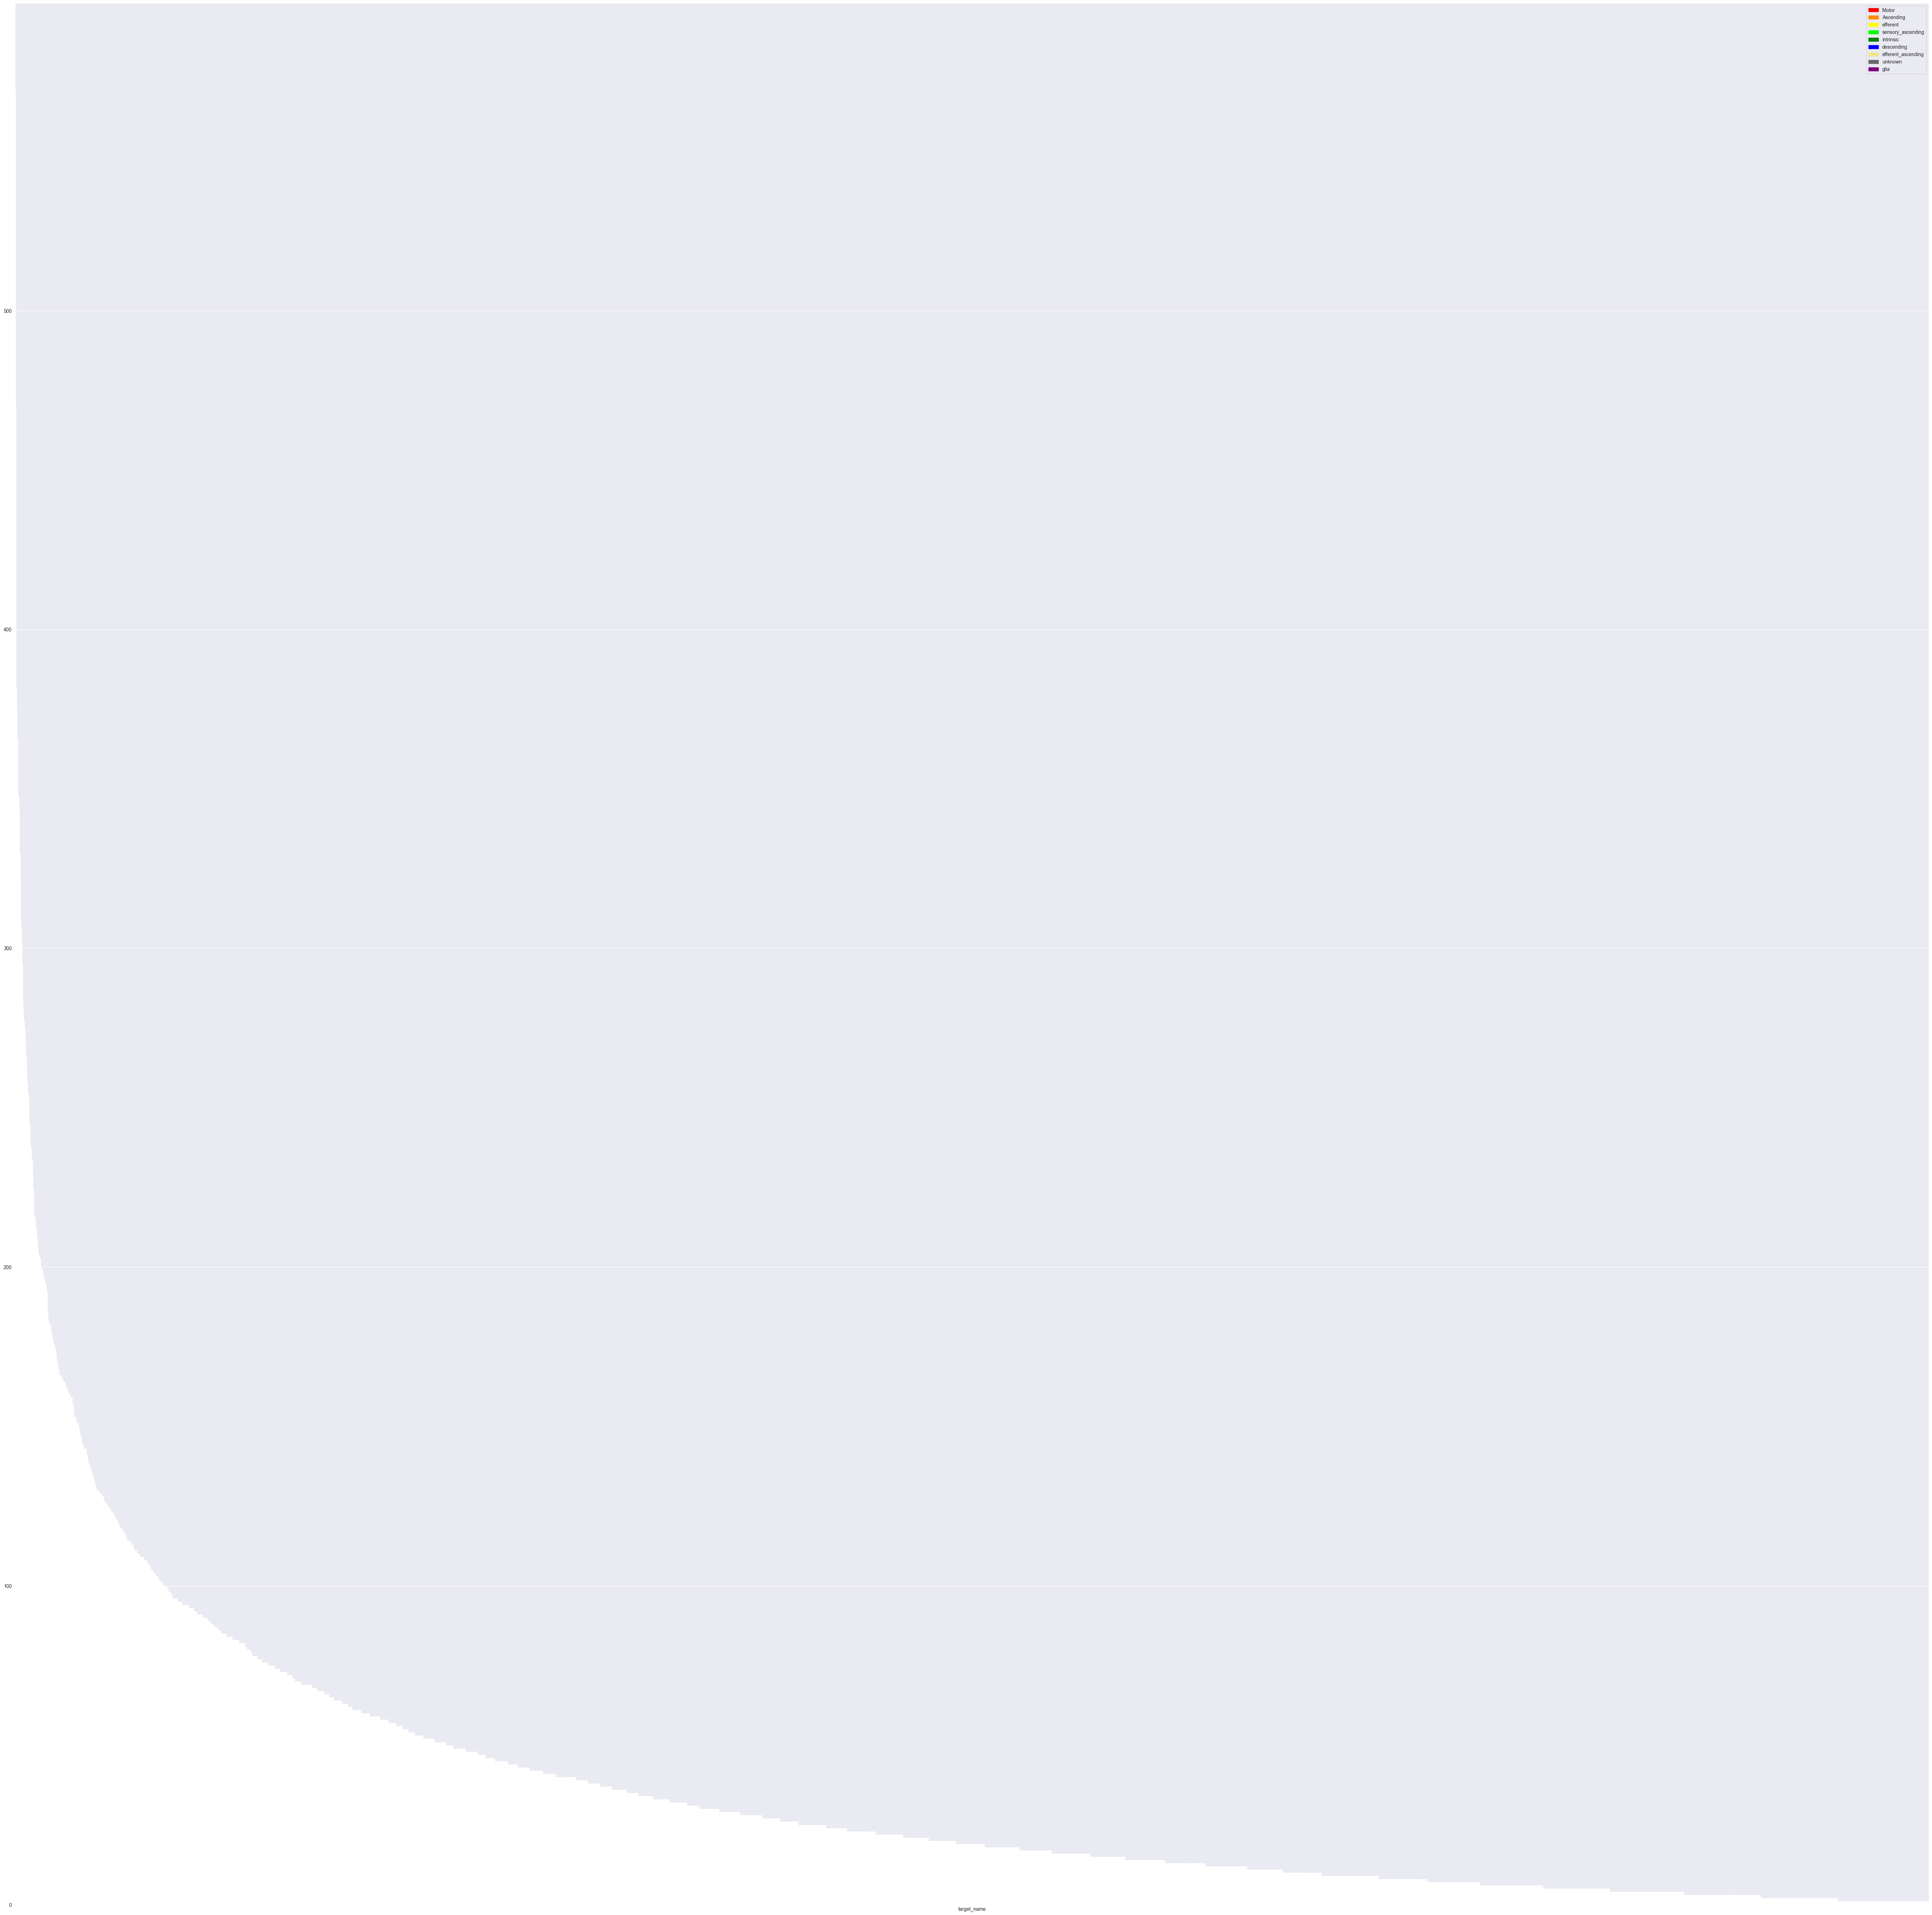

In [4]:
p =utils.plot_target_count(df)

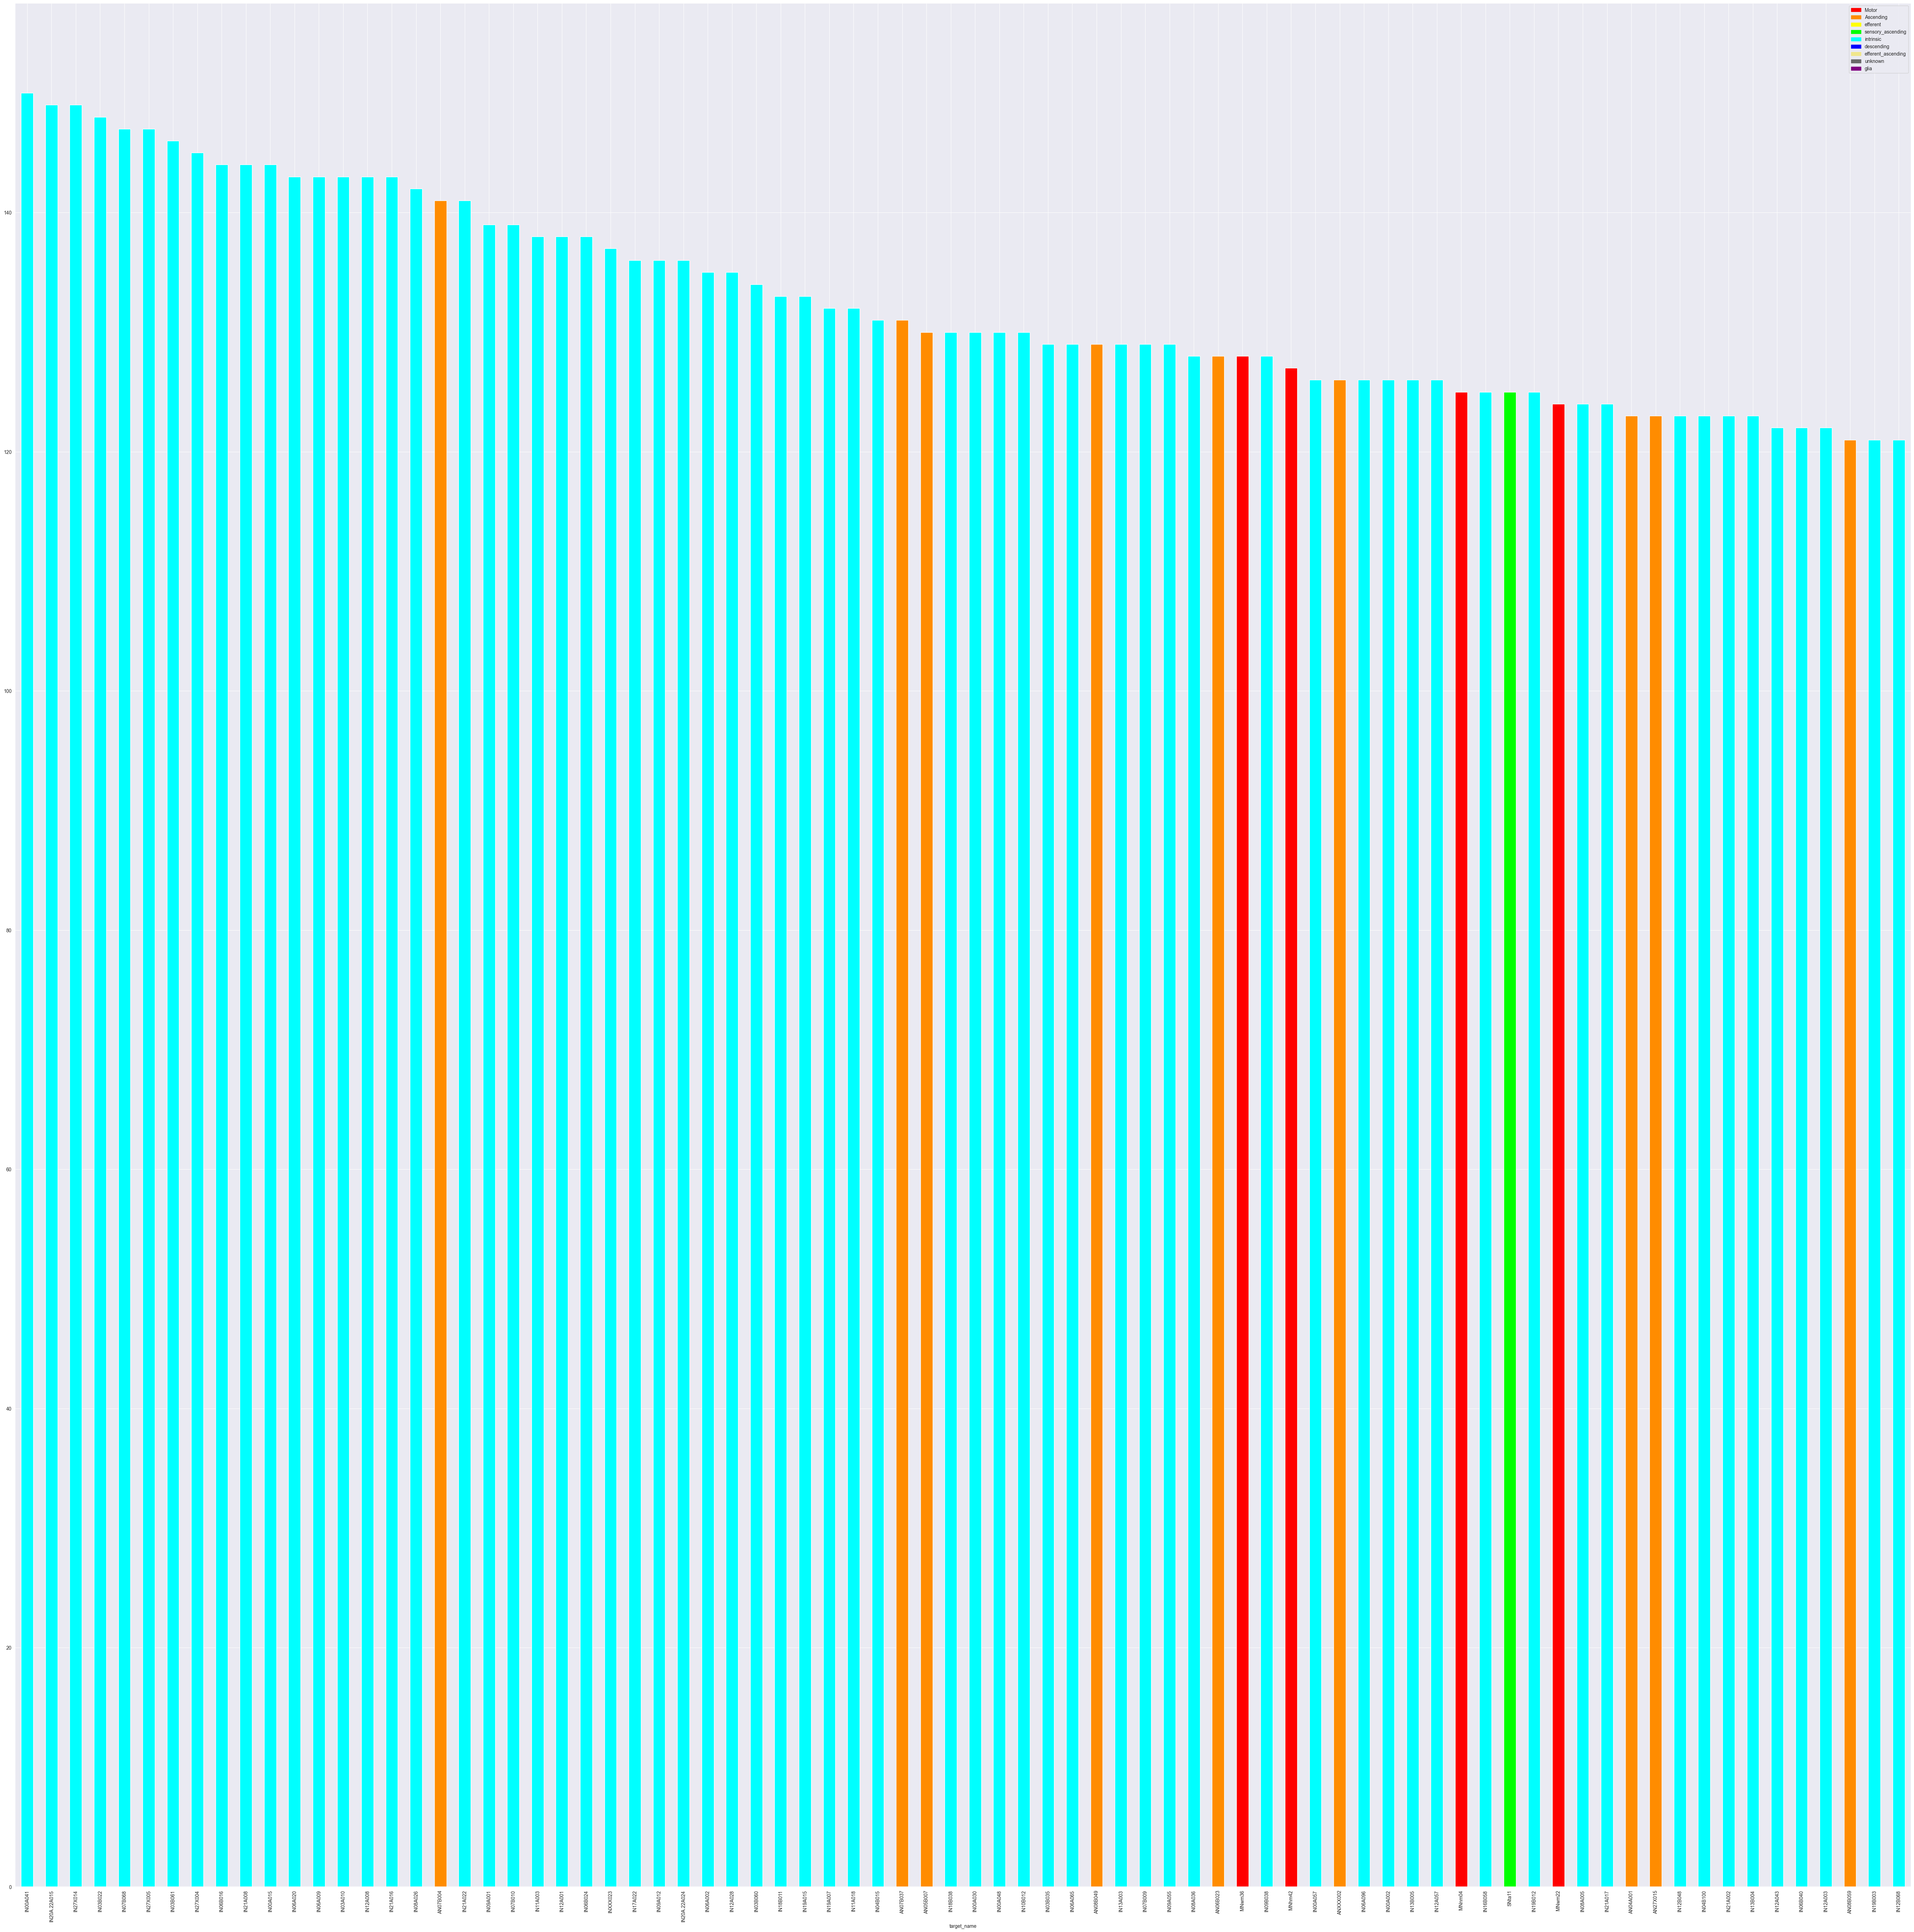

In [5]:
#Yozu can specify lower or/and upper bounds to target a specific range, and can display names (don't recommend it when plotting a lot of data, it'll get messy)
p = utils.plot_target_count(df,upper_bound=150,lower_bound=120,show_name=True)

In [12]:
input_neurons = vnc.get_neuron_ids(
    {
        'class_1' : 'descending', # descending neuron
    }
)

ascending_neurons = vnc.get_neuron_ids(
    {
        'class_1' : 'ascending',

    })
sensory_neurons = vnc.get_neuron_ids(
    {
        'class_1' : 'sensory',

    })
motor_neurons = vnc.get_neuron_ids(
    {
        'class_1' : 'motor',

    })

intrinsic_neurons = vnc.get_neuron_ids(
    {
        'class_1' : 'intrinsic',

    })
s_ascending_neurons = vnc.get_neuron_ids(
    {
        'class_1' : 'sensory_ascending',

    })
eff_neurons = vnc.get_neuron_ids(
    {
        'class_1' : 'efferent',

    })
eff_as_neurons = vnc.get_neuron_ids(
    {
        'class_1' : 'efferent_ascending',

    })
unknown_neurons = vnc.get_neuron_ids(
    {
        'class_1' : 'unknown',

    })


print(f"Found {len(input_neurons)} descending neurons")
print(f"Found {len(ascending_neurons)} ascending neurons")
print(f"Found {len(sensory_neurons)} sensory neurons")
print(f"Found {len(motor_neurons)} motor neurons")
print(f"Found {len(intrinsic_neurons)} intrinsic neurons")
print(f"Found {len(s_ascending_neurons)} sensory ascending neurons")

Found 1328 descending neurons
Found 1849 ascending neurons
Found 5891 sensory neurons
Found 736 motor neurons
Found 13040 intrinsic neurons
Found 534 sensory ascending neurons


Show the distribution of the neurons present in the vnc

Text(0.5, 1.0, 'Class of targeted neurons')

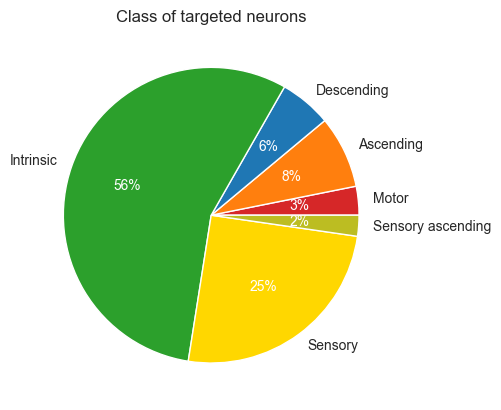

In [14]:
class_labels = ['Motor','Ascending','Descending','Intrinsic','Sensory','Sensory ascending']
ascending_count = len(ascending_neurons)
motor_count = len(motor_neurons)
descending_count = len(input_neurons)
intrinsic_count = len(intrinsic_neurons)
sensory_count = len(sensory_neurons)
sens_as_count = len(s_ascending_neurons)
other_count = len(eff_neurons) + len(eff_as_neurons) + len(unknown_neurons)
fig, ax = plt.subplots()
_,_,m = ax.pie(x = [motor_count,ascending_count,descending_count,intrinsic_count,sensory_count,sens_as_count], autopct='%1.0f%%', labels=class_labels, colors=[
        # matplotlib named colors
        'tab:red', 'tab:orange', 'tab:blue', 'tab:green','gold','tab:olive','tab:gray'],wedgeprops = {"edgecolor" : "white"})
[m[i].set_color('white') for i in range(len(m))]
plt.title("Class of targeted neurons")


2.5 Saving plots

It's easier to see the plot when in .png so that you can open it and zoom it. The next cell is to show how to save the plots.

In [11]:
#All functions of plotting a plot p
p.get_figure().savefig("images/images_report/exemple.png")

### Com-like DN
Plotting the distribution of known comDN

In [15]:
neuron_list_walking = ["DNut004","DNxl001","DNxl002","DNxl005","DNxl017","DNxn049","DNxn076","DNxn050"] # Walking
neuron_list_flying = ["DNut001","DNut002","DNut007","DNut008","DNut009","DNut010","DNut021","DNut028","DNwt001","DNxn003","DNxn013","DNxn035"] #Flying
neuron_list_anterior = ["DNfl001","DNfl002","DNfl003","DNnt002","DNxn014"] #Anterior
neuron_list_takeoff = ["DNlt002","DNlt003","DNlt004","DNlt005","DNxn026","DNxn029","DNxn045"]

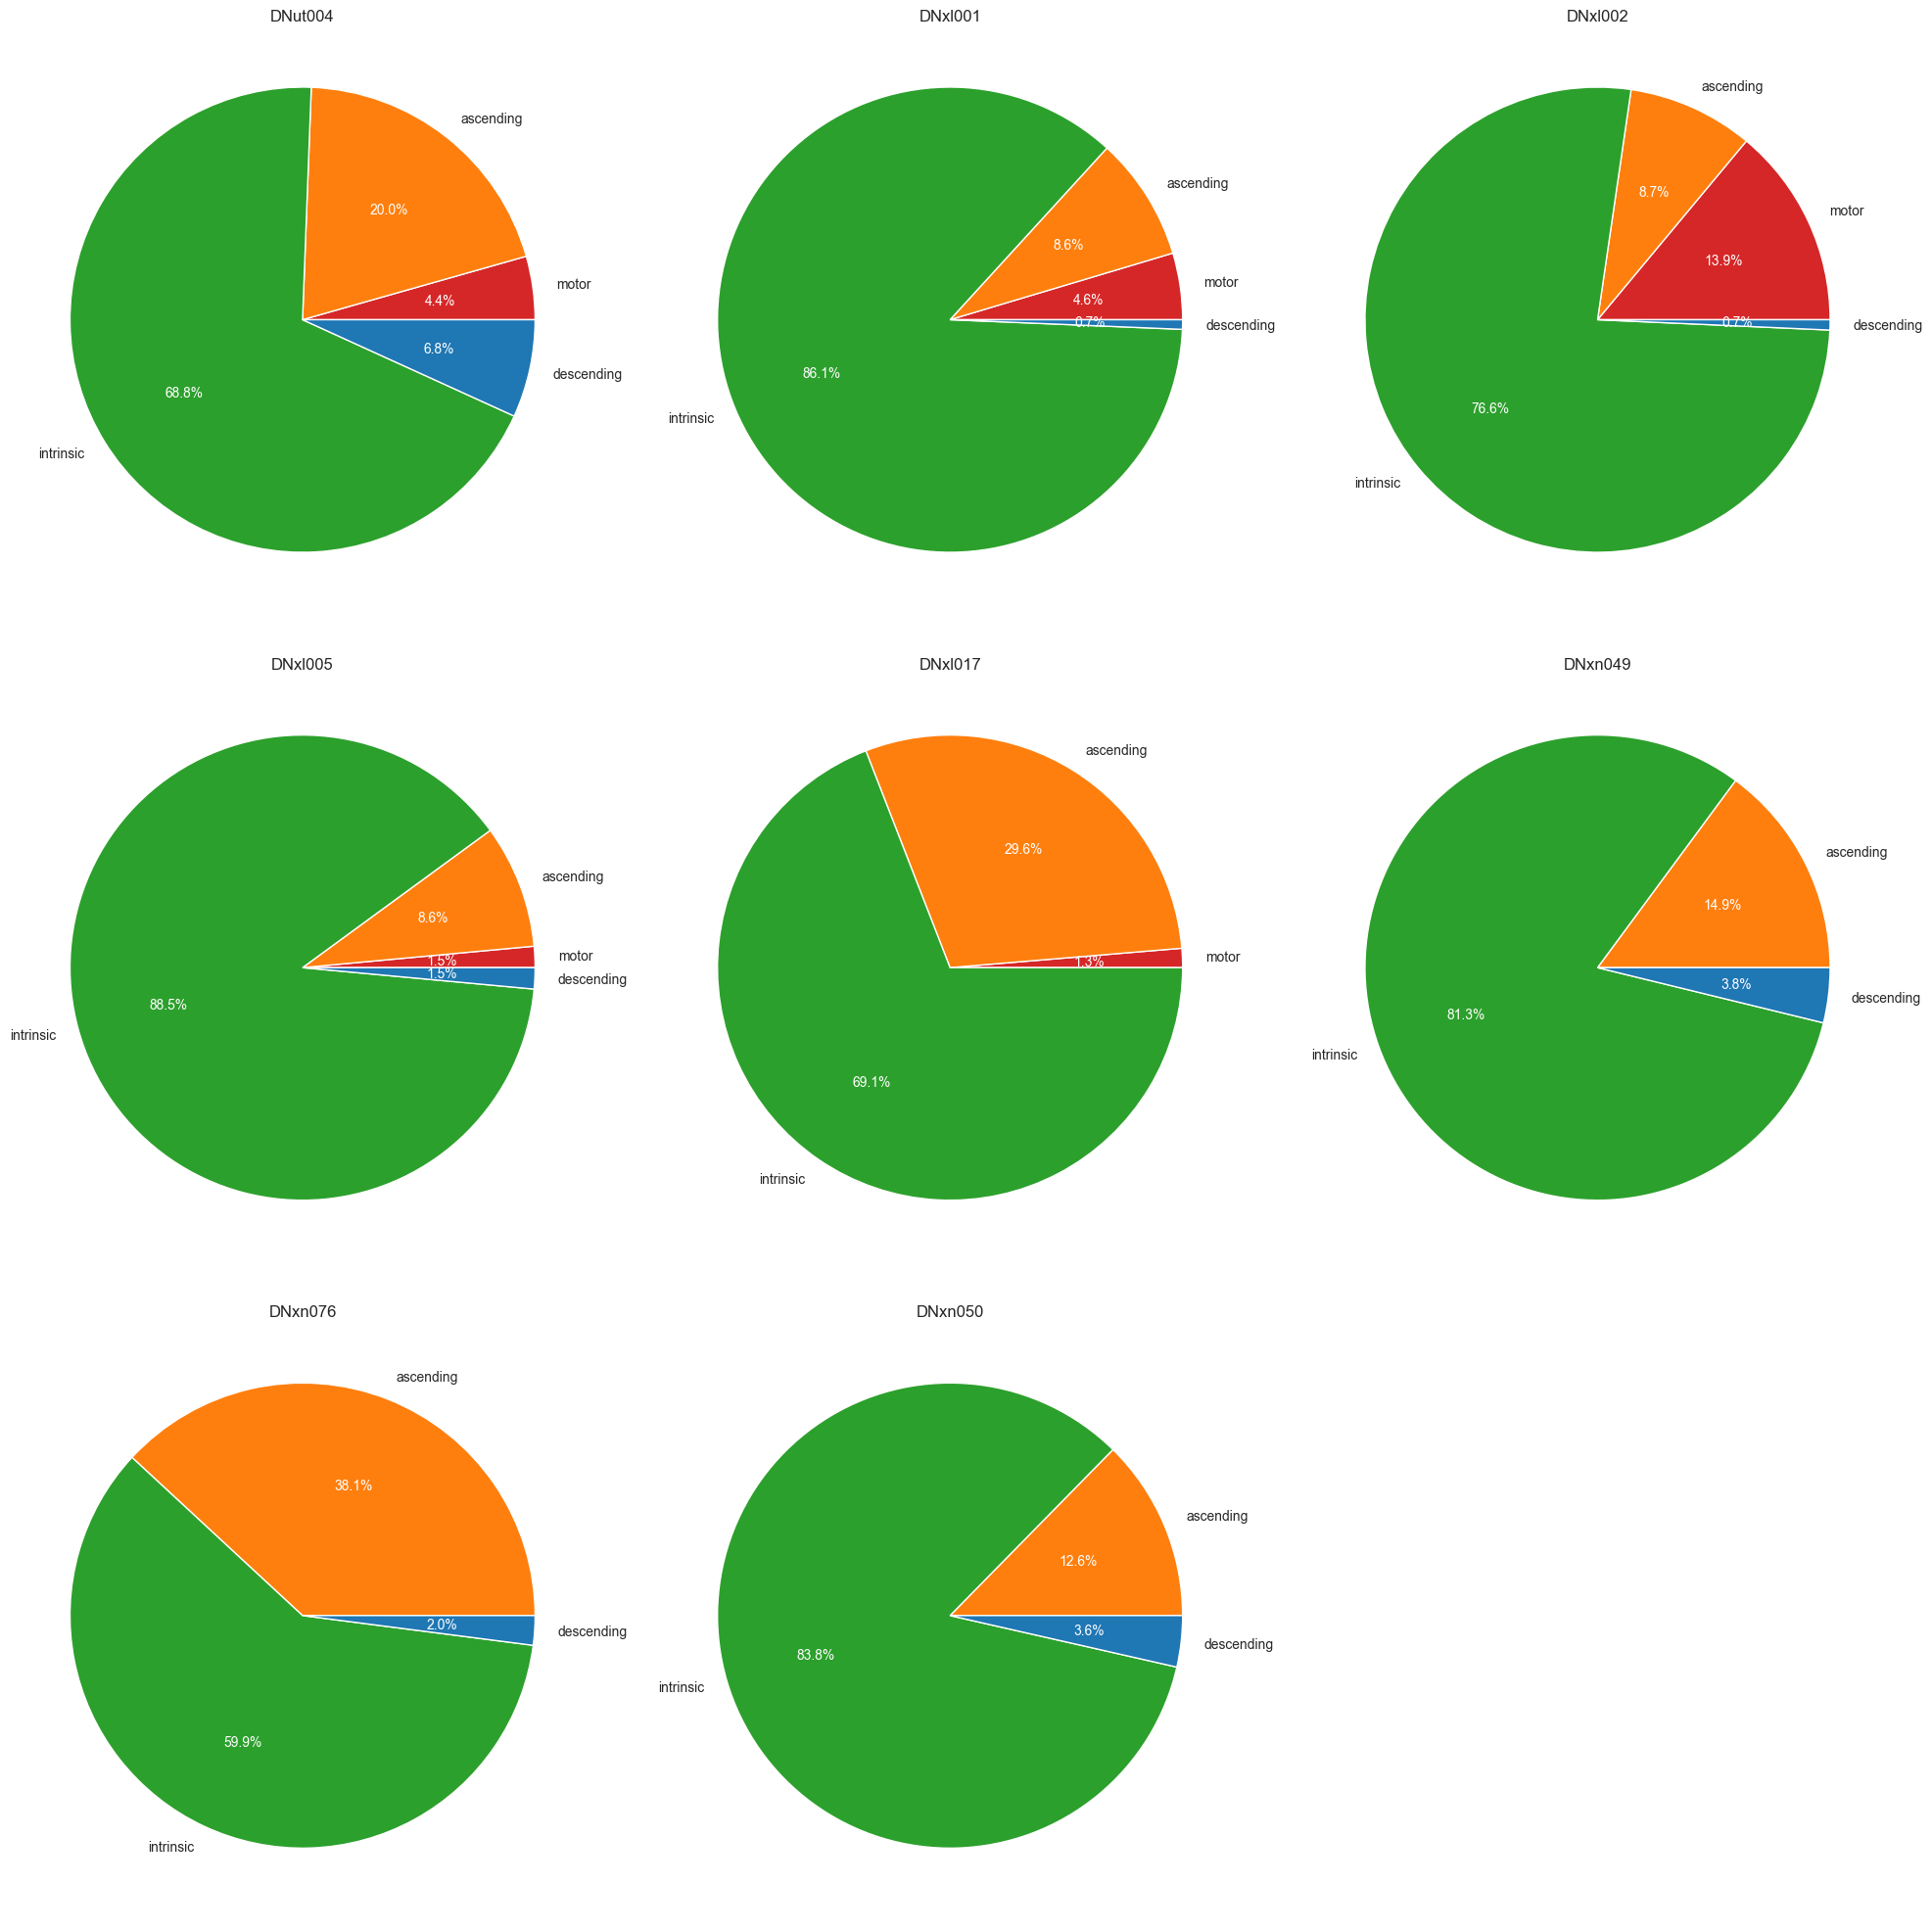

In [16]:
utils.plot_repartition_list(df,neuron_list_walking)

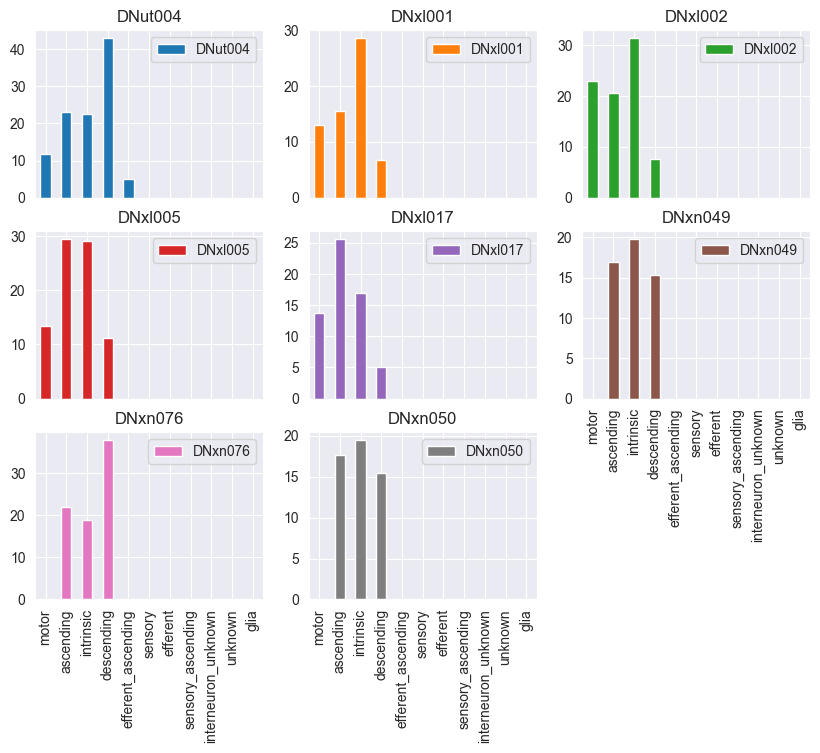

In [17]:
utils.plot_ratio_syn_per_class_list(df,neuron_list_walking)

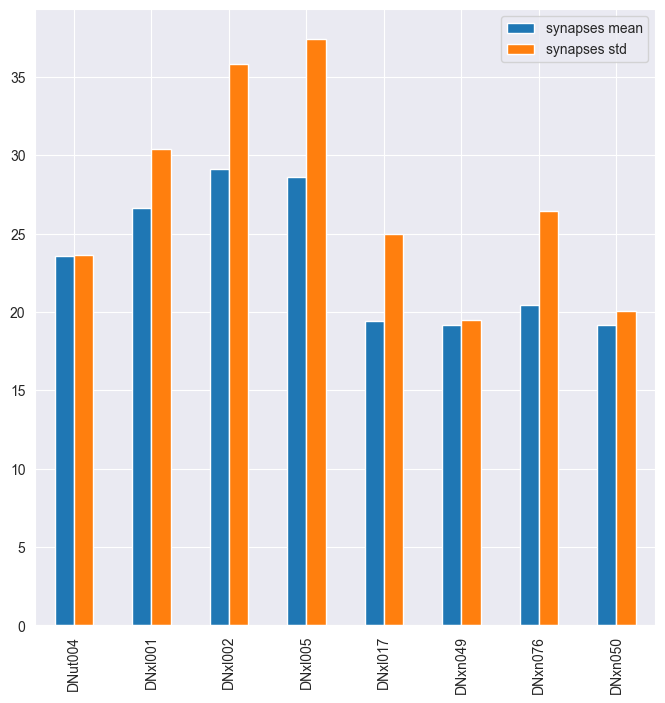

In [18]:
utils.plot_avg_synapse(df,neuron_list_walking)

## DN to intrinsic only


In [3]:
df_intrinsic_T1 = pandas.read_csv("dataset/data_set_intrinsic_T1.csv") #load data for T1
display(df_intrinsic_T1)

,Unnamed: 0,source_uid,source_bid,source_name,source_class,target_uid,target_bid,target_name,target_class,nt_type,neuropil,syn_count,eff_weight
0,0,889,10095,DNxl055,descending,0,20142,IN03A062,intrinsic,gaba,T1,9,-9
1,1,7973,10117,DNxl080,descending,0,20142,IN03A062,intrinsic,gaba,T1,9,-9
2,2,12727,10240,DNxl048,descending,0,20142,IN03A062,intrinsic,gaba,T1,7,-7
3,3,14360,10339,DNxl058,descending,0,20142,IN03A062,intrinsic,acetylcholine,T1,6,6
4,4,1178,10466,DNxl040,descending,0,20142,IN03A062,intrinsic,gaba,T1,20,-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35790,35790,8121,18568,DNxl021,descending,23536,152784,IN08A034,intrinsic,acetylcholine,T1,5,5
35791,35791,1454,21380,DNxl082,descending,23536,152784,IN08A034,intrinsic,acetylcholine,T1,14,14
35792,35792,22121,23404,DNfl012,descending,23536,152784,IN08A034,intrinsic,glutamate,T1,27,-27
35793,35793,6770,31742,DNfl002,descending,23536,152784,IN08A034,intrinsic,acetylcholine,T1,11,11


In [4]:
df_intrinsic_T2 = pandas.read_csv("dataset/data_set_intrinsic_T2.csv")
df_intrinsic_T3 = pandas.read_csv("dataset/data_set_intrinsic_T3.csv")

### Brain cluster distribution into leg neuropil

In [5]:
data_cluster = pandas.read_csv("dataset/Clusters.csv") #Data set for clusters
brain_to_vnc_dataset_new = pandas.read_csv("dataset/manc_to_fafb.csv") # Mapping manc names to fafb

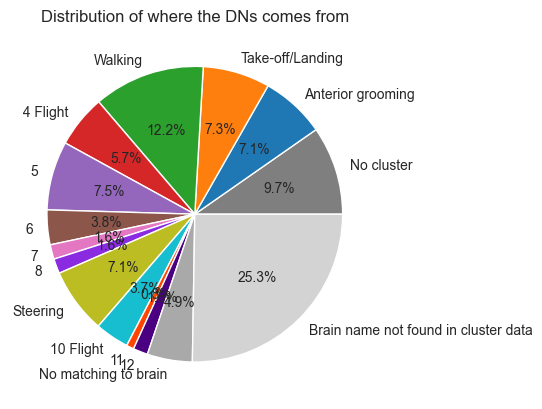

In [6]:
connections_dataset = df_intrinsic_T1
utils.plot_cluster_distribution_new(connections_dataset,data_cluster,brain_to_vnc_dataset_new,"newMatching_MANC_to_FAFB_T1.png","MANC to FAFB",old_dataset=False)

In [8]:
df_name = df_intrinsic_T1["target_name"].unique() # Get all the names of the intrinsic neurons
df_merged, df_cluster_no_index = utils.create_cluster_data(df_name, df_intrinsic_T1, data_cluster, brain_to_vnc_dataset_new,vnc)

Attribute nt_type not found in the graph. Adding it.


### UMAP of intrinsic neurons based on inputs

C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Text(0.5, 1.0, 'UMAP projection of cluster dataset using cosine, with neighbors number : 17')

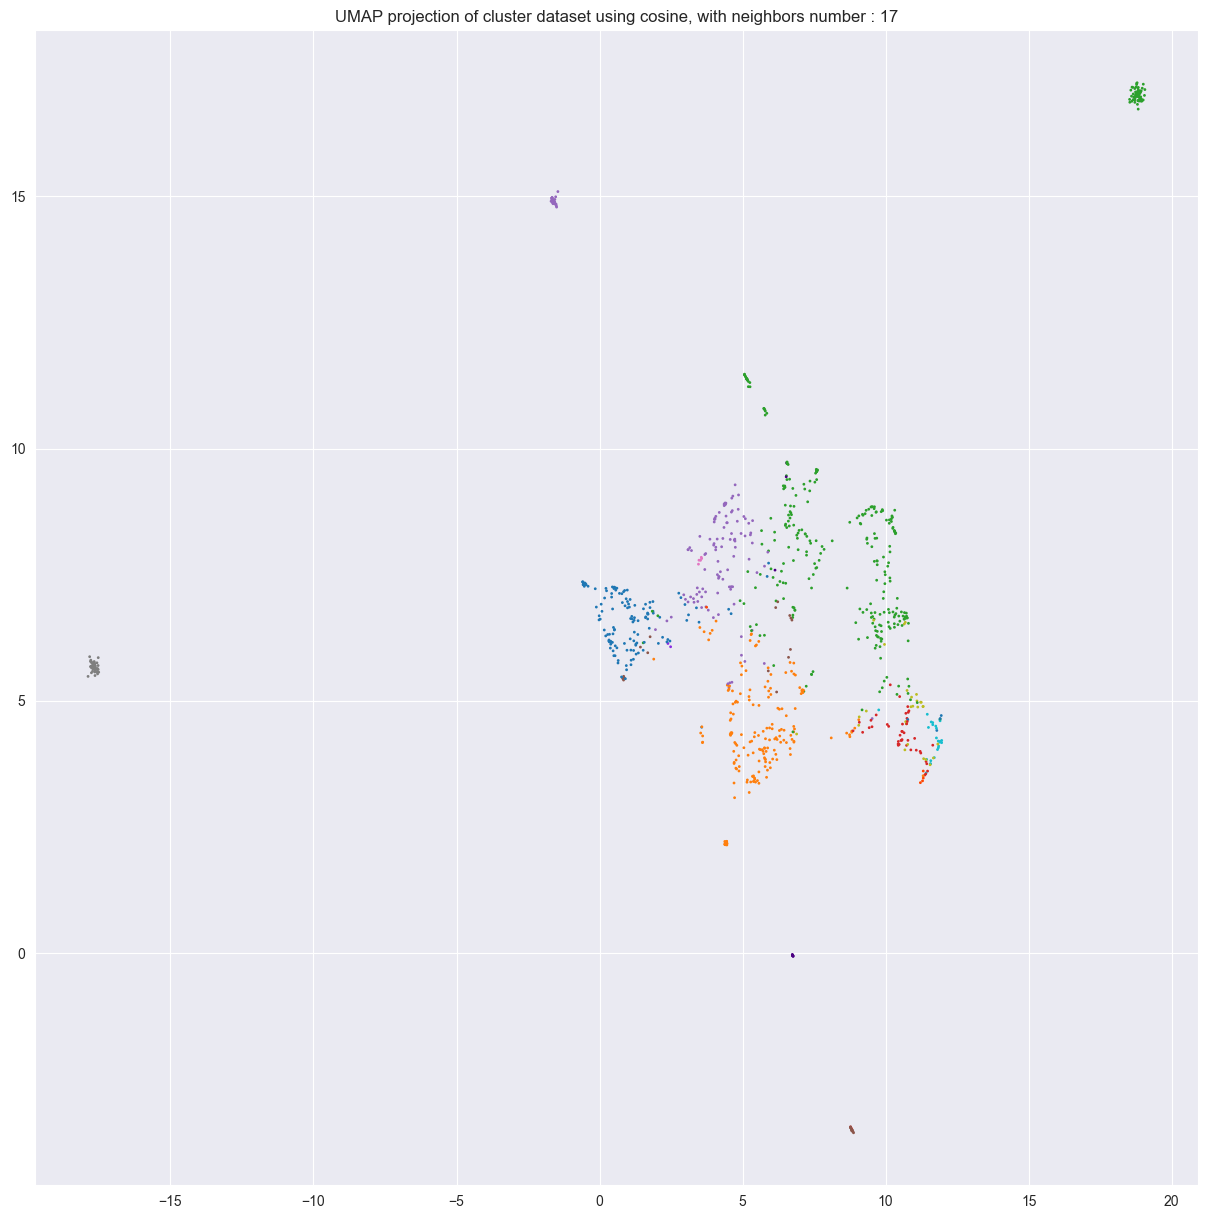

In [10]:
metric = 'cosine'
n_neighbors = 17
reducer = umap.UMAP(n_neighbors = n_neighbors,random_state=11,metric = metric)
embedding = reducer.fit_transform(df_cluster_no_index)
plt.figure(figsize=(15,15))
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],s =1,c = df_merged["color"].values) # alpha = np.clip(alphas,0,1)
plt.title(f'UMAP projection of cluster dataset using {metric}, with neighbors number : {n_neighbors}')


### Interactive map

In [11]:
hover_data = pandas.DataFrame({'name' : df_merged["index"].values,'uid' : df_merged['uid'].values, 'cluster' : df_merged["label"].values})

In [12]:
mapper = reducer.fit(df_cluster_no_index)
umap.plot.output_notebook()
p = umap.plot.interactive(mapper, labels = df_merged["label"].values,hover_data=hover_data)
umap.plot.show(p) ## Can hover over the data to see information about it

C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Loading BokehJS ...

## Intrinsic neurons to motor neurons

In [6]:
df_inter_motor_T1 = pandas.read_csv("dataset/data_intrinsic_motor_T1.csv")
display(df_inter_motor_T1)

,Unnamed: 0,source_uid,source_bid,source_name,source_class,source_type,target_uid,target_bid,target_name,target_class,target_type,target_muscle,syn_count,eff_weight
0,0,0,20142,IN03A062,intrinsic,acetylcholine,4567,13163,MNfl40,motor,glutamate,Ti flexor,13,13
1,1,0,20142,IN03A062,intrinsic,acetylcholine,11570,13283,MNfl21,motor,glutamate,Ti flexor,9,9
2,2,0,20142,IN03A062,intrinsic,acetylcholine,12793,13399,MNfl21,motor,glutamate,Ti flexor,32,32
3,3,0,20142,IN03A062,intrinsic,acetylcholine,22074,18440,MNfl07,motor,glutamate,Tr flexor,5,5
4,4,0,20142,IN03A062,intrinsic,acetylcholine,6633,18963,MNfl28,motor,glutamate,Acc. ti flexor,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14873,14873,23531,10776,IN14B002,intrinsic,gaba,5505,13170,MNhl24,motor,glutamate,Acc. ti flexor,5,-5
14874,14874,23531,10776,IN14B002,intrinsic,gaba,12899,16228,MNhl25,motor,glutamate,Acc. ti flexor,10,-10
14875,14875,23531,10776,IN14B002,intrinsic,gaba,3958,18491,MNhl40,motor,glutamate,Ti flexor,7,-7
14876,14876,23531,10776,IN14B002,intrinsic,gaba,16564,19260,MNhl25,motor,glutamate,Acc. ti flexor,5,-5


In [7]:
df_inter_motor_T2 = pandas.read_csv("dataset/data_intrinsic_motor_T2.csv")
df_inter_motor_T3 = pandas.read_csv("dataset/data_intrinsic_motor_T3.csv")

## UMAP for intrinsic neurons based on motor outputs

In [11]:
intrinsic_name = df_inter_motor_T1["source_name"].unique()
keys = df_inter_motor_T1["target_name"].unique()
motor_data_merged, motor_data_no_index = utils.create_inter_motor_data(intrinsic_name,df_inter_motor_T1,df_intrinsic_T1,data_cluster,brain_to_vnc_dataset_new,vnc,keys)

Attribute nt_type not found in the graph. Adding it.


C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Text(0.5, 1.0, "UMAP projection of inter neurons based on the motor neurons it's targeting")

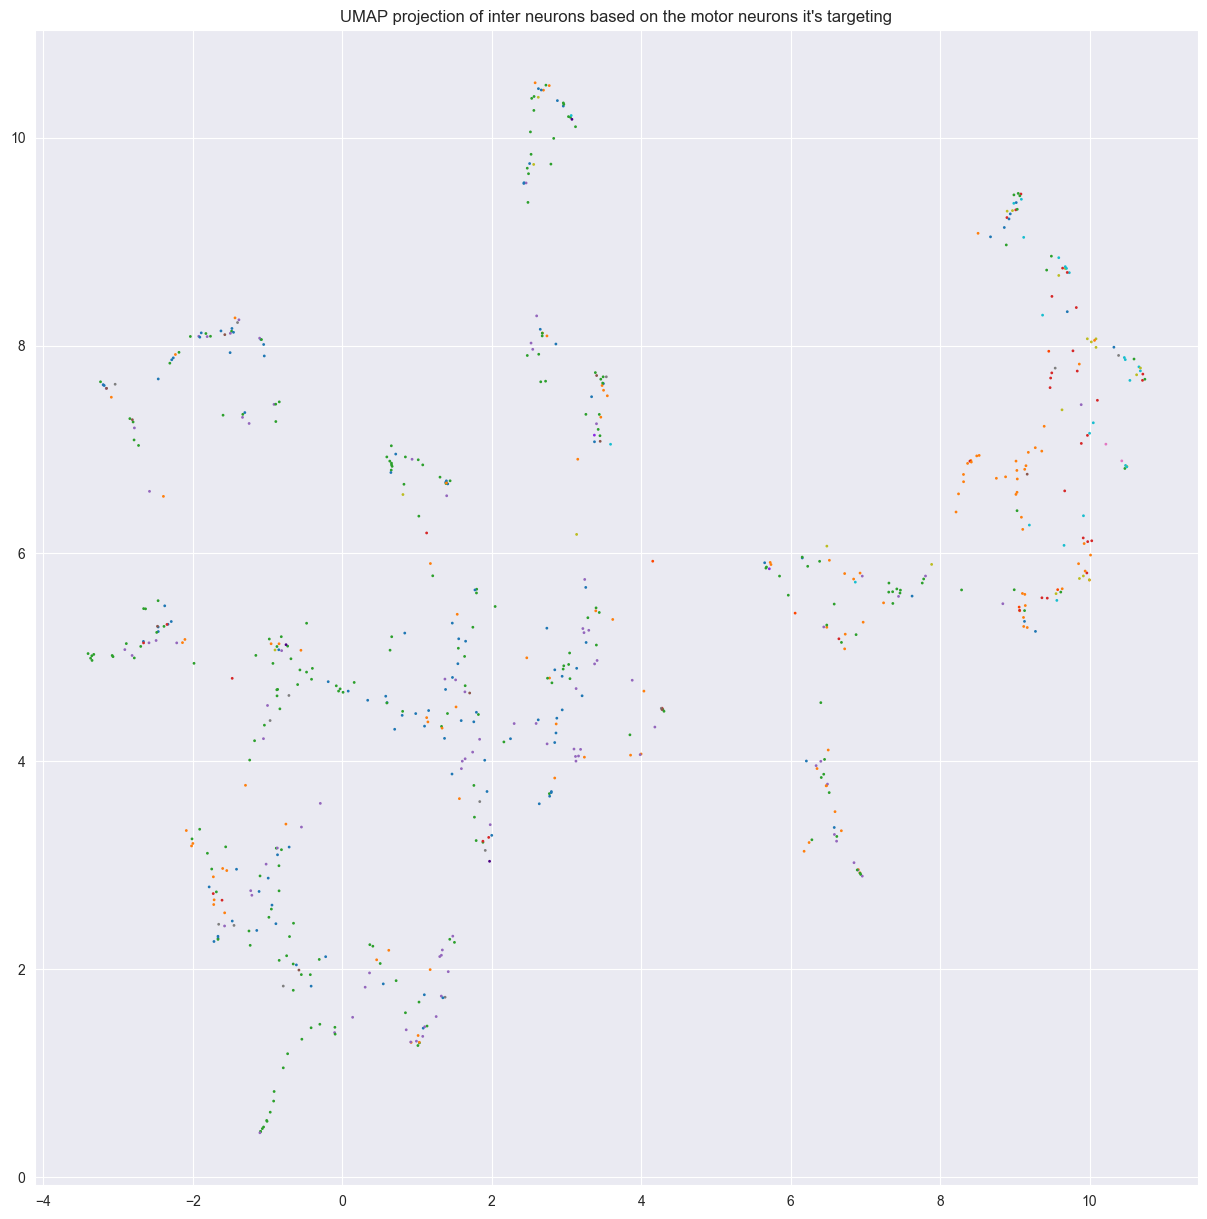

In [12]:
metric = 'cosine'
n_neighbors = 11
reducer = umap.UMAP(n_neighbors = n_neighbors,random_state=11,metric = metric)
embedding = reducer.fit_transform(motor_data_no_index)
plt.figure(figsize=(15,15))
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],s =1,c = motor_data_merged["color"].values) # alpha = np.clip(alphas,0,1)
plt.title(f'UMAP projection of inter neurons based on the motor neurons it\'s targeting')

## UMAP for intrinsic neurons based on muscle outputs

In [18]:
intrinsic_name = df_inter_motor_T1["source_name"].unique()
muscle_keys = list(utils.muscle_to_color.keys())
keys = df_inter_motor_T1["target_name"].unique()
muscle_data_merged, muscle_data_no_index = utils.create_inter_motor_data(intrinsic_name,df_inter_motor_T1,df_intrinsic_T1,data_cluster,brain_to_vnc_dataset_new,vnc,keys,False,muscle_keys)

C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Léa\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Text(0.5, 1.0, "UMAP projection of inter neurons based on the muscle neurons it's targeting (color based on target)")

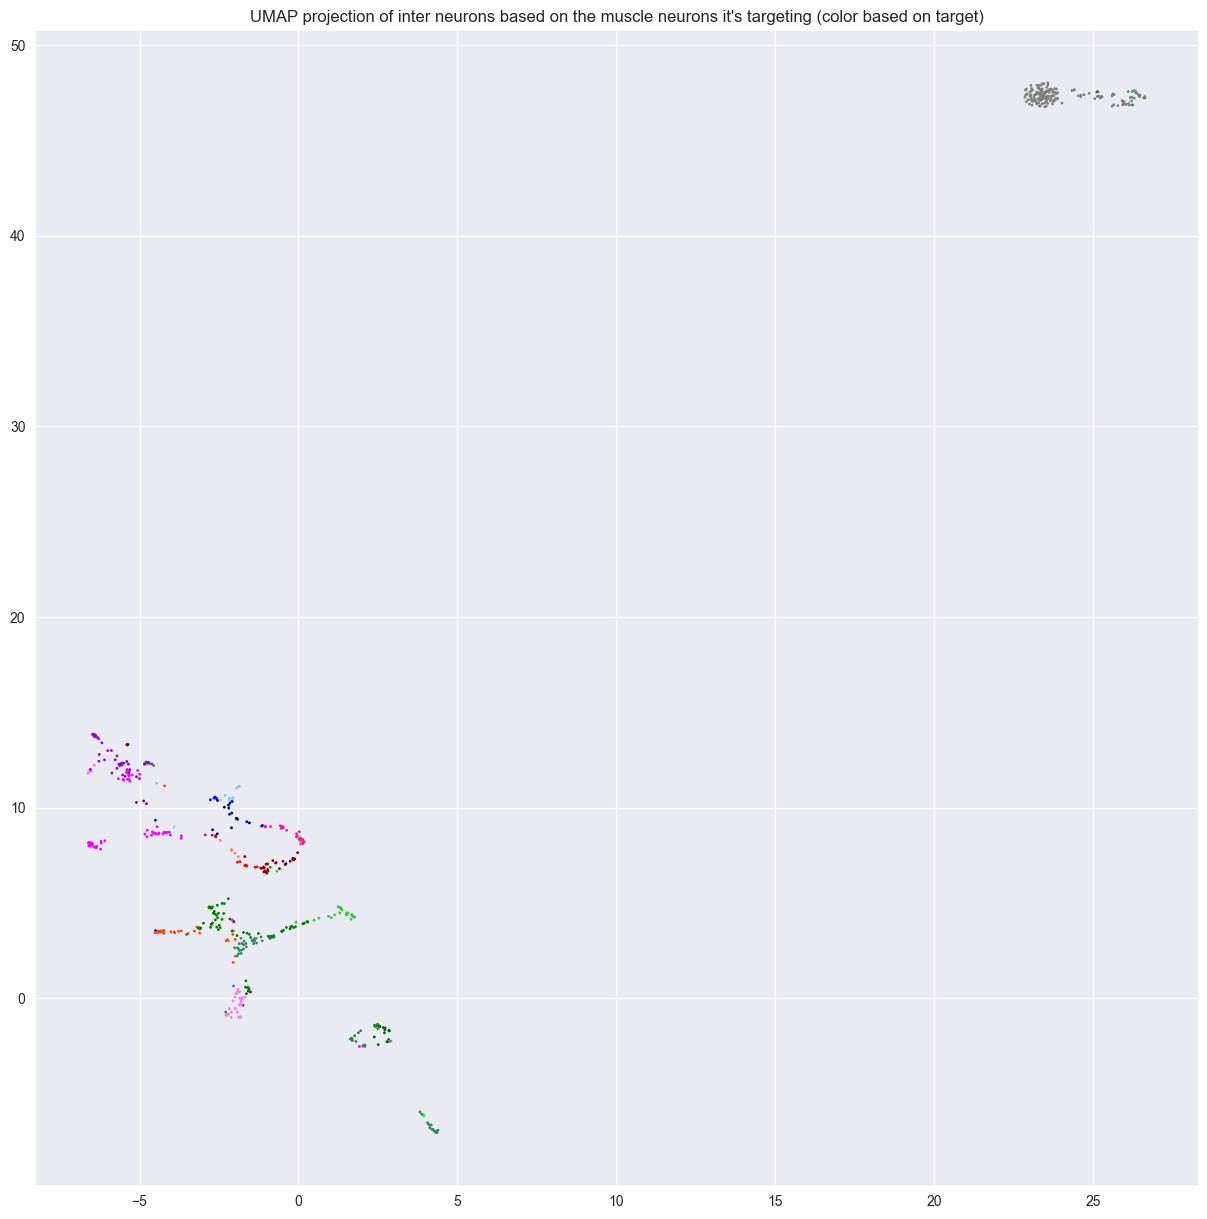

In [19]:
metric = 'cosine'
n_neighbors = 11
reducer = umap.UMAP(n_neighbors = n_neighbors,random_state=11,metric = metric)
embedding = reducer.fit_transform(muscle_data_no_index)
plt.figure(figsize=(15,15))
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],s =1,c = muscle_data_merged["color"].values)
plt.title(f'UMAP projection of inter neurons based on the muscle neurons it\'s targeting (color based on target)')

## Clustering and adjacency matrix

In [9]:
#cluster_in_1 = list({463,1171,11444,4432,1102,1051,7117,2827,1631,8644,3057,11376,4298,7661,4717,10411,379,5221,13387,7013,3345,7808,8954,687,2028,1084,2424,7158,3876,7420,7158,4462})
cluster_1 = [463,1171,11444,4432,1102,1051,7117,2827,1631,8644,3057,11376,4298,7661,4717,10411,379,5221,13387,7013,3345,7808,8954,687,2028,1084,2424,7158,3876,7420,7158,4462] #List of uid from clusters in the umap

Attribute class_1 not found in the graph. Adding it.


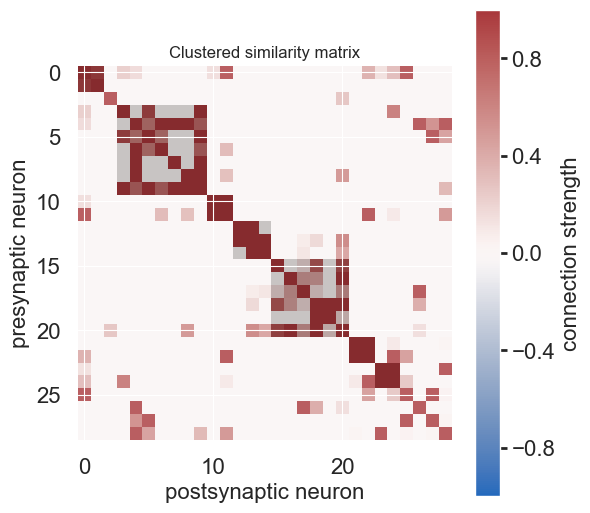

In [10]:
import numpy as np
(
    clustered_cmatrix,  # clustered similarity matrix as cmatrix object
    bodyid_clusters,  # list of lists of uids in each cluster
    index_clusters,  # list of lists of indices in each cluster matching the clustered cmatrix
) = utils.inter_clusters_syn_count(vnc,cluster_1,2)

fig, ax = plt.subplots(figsize=(6,6))
# Visualise the similarity matrix and its clusters
clustered_sim_mat = clustered_cmatrix.get_matrix().todense()
# create a matrix of zeros
mat = np.zeros((clustered_sim_mat.shape[0], clustered_sim_mat.shape[1]))
# draw the boundaries between clusters
for cluster in index_clusters:
    mat[cluster[0] : cluster[-1] + 1, cluster[0] : cluster[-1] + 1] = 1
_ = clustered_cmatrix.imshow(savefig=False, ax=ax, title="Clustered similarity matrix")
ax.imshow(mat, cmap="binary", alpha=0.2)

### Clustering for all intrinsic neurons

In [11]:
all_intrinsic = list(set(df_inter_motor_T1["source_uid"].tolist()) & set(df_intrinsic_T1["target_uid"].tolist())) #Those who have both inputs from DN and outputs to MN

In [12]:
# Method for clustering
clustering_method = 'markov' #Hierarchical or markov ?
# distance metric
distance_metric = 'euclidean'
# cutoff to define a cluster
cutoff = 0.5
# minimum number of neurons in a cluster
c_min = 2

Attribute class_1 not found in the graph. Adding it.


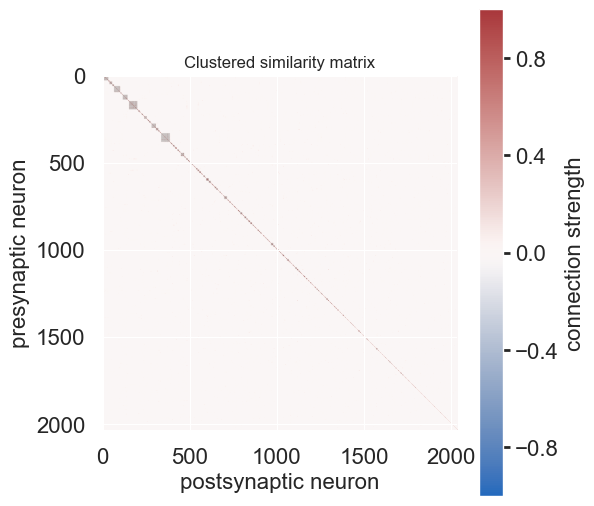

In [13]:
(
    clustered_cmatrix,  # clustered similarity matrix as cmatrix object
    uid_clusters,  # list of lists of uids in each cluster
    index_clusters,  # list of lists of indices in each cluster matching the clustered cmatrix
) = utils.inter_clusters_syn_count(vnc,all_intrinsic,2)

fig, ax = plt.subplots(figsize=(6,6))
# Visualise the similarity matrix and its clusters
clustered_sim_mat = clustered_cmatrix.get_matrix().todense()
# create a matrix of zeros
mat = np.zeros((clustered_sim_mat.shape[0], clustered_sim_mat.shape[1]))
# draw the boundaries between clusters
for cluster in index_clusters:
    mat[cluster[0] : cluster[-1] + 1, cluster[0] : cluster[-1] + 1] = 1
_ = clustered_cmatrix.imshow(savefig=False, ax=ax, title="Clustered similarity matrix")
ax.imshow(mat, cmap="binary", alpha=0.2)

## Testing clusters found

In [14]:
random_cluster = uid_clusters[4]

[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[5. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[4. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0.]
[4. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[5. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0.]
[5. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[11.  0.  0.  0.  3.  2.  0.  0.  0.  0.  0.  0.]


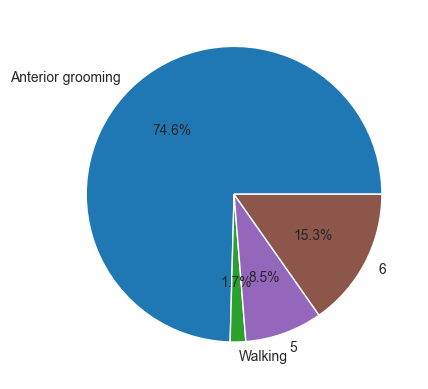

In [15]:
utils.plot_cluster_distribution_list_neurons(random_cluster,df_intrinsic_T1,data_cluster, brain_to_vnc_dataset_new)

['g', 'forestgreen', 'limegreen', 'darkgreen', 'lime', 'seagreen', 'navy', 'blue', 'skyblue', 'darkred', 'red', 'salmon', 'orangered', 'firebrick', 'violet', 'purple', 'darkviolet', 'magenta', 'deeppink', 'tab:gray']


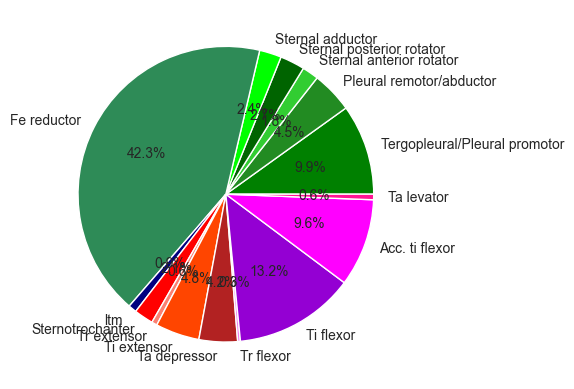

In [16]:
utils.plot_muscle_distribution_list_neurons(random_cluster,df_intrinsic_T1,df_inter_motor_T1)